# –ê–ù–ê–õ–ò–ó –í–†–ï–ú–ï–ù–ù–´–• –†–Ø–î–û–í 

## –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è ‚Ññ1 –í—ã—è–≤–∏—Ç—å –≤ –∑–∞–¥–∞–Ω–Ω–æ–º –≤—Ä–µ–º–µ–Ω–Ω–æ–º —Ä—è–¥—É –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –ò—Ä–≤–∏–Ω–∞. –û–±–Ω–∞—Ä—É–∂–µ–Ω–Ω—ã–µ –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–º–µ–Ω–∏—Ç—å –ø—É—Ç–µ–º –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ —Å–æ—Å–µ–¥–Ω–∏–º —Ç–æ—á–∫–∞–º. 
```
–í—ã–ø–æ–ª–Ω–∏—Ç—å —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å–ª–µ–¥—É—é—â–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏: ‚Ä¢ —Å—Ä–µ–¥–Ω–µ–∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–∞—è –ø–æ 5 —Ç–æ—á–∫–∞–º; 
‚Ä¢ —Å—Ä–µ–¥–Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è –ø–æ 5 —Ç–æ—á–∫–∞–º; 
‚Ä¢ —Å—Ä–µ–¥–Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è –ø–æ 7 —Ç–æ—á–∫–∞–º; 
‚Ä¢ —Å—Ä–µ–¥–Ω–µ-—Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∞—è –ø–æ 12 —Ç–æ—á–∫–∞–º; 
‚Ä¢ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ. 
–ù–∞ –æ–¥–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º–µ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ä—è–¥–∞ –∏ –≤—Å–µ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–µ —Ä—è–¥—ã.
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

from scipy.stats import skew, kurtosis, ttest_1samp
from scipy.optimize import curve_fit

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from scipy import stats

/var/folders/d5/7h_xmkjn47nbw0jsxg5xgvyw0000gn/T/ipykernel_84579/3310339792.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True)


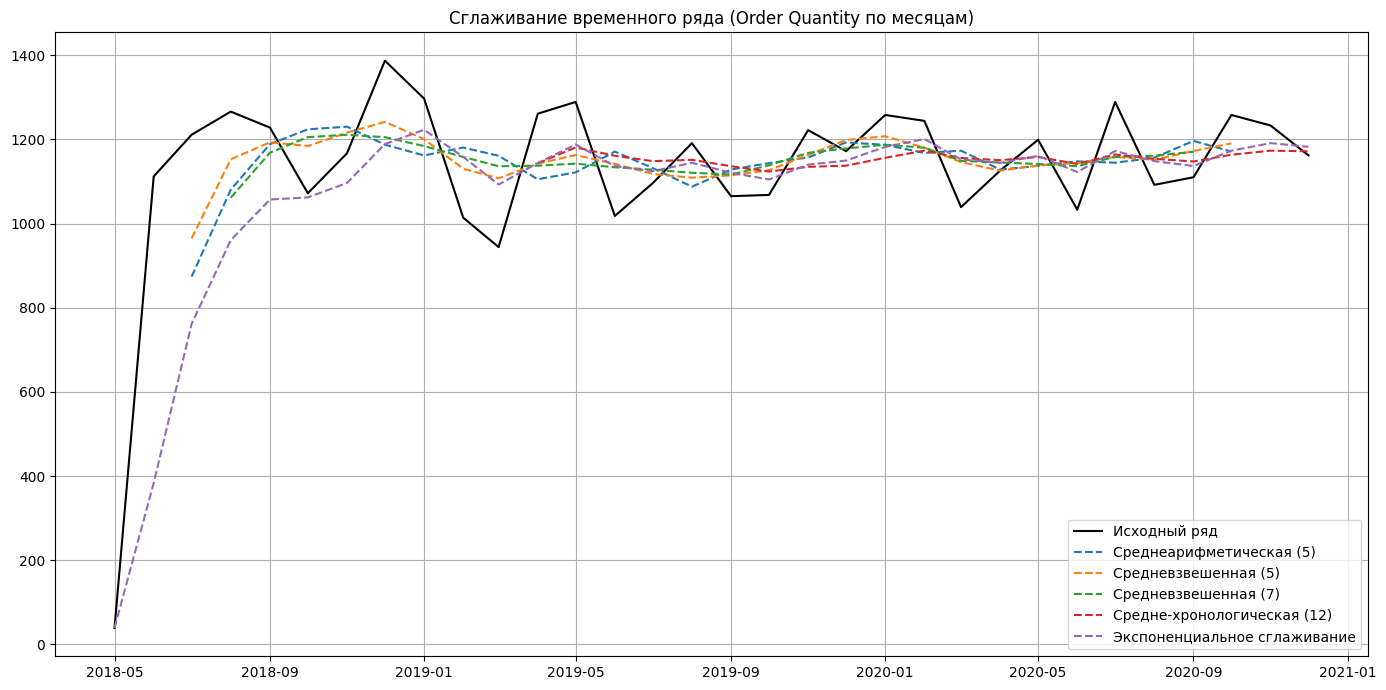

In [99]:
df = pd.read_csv("SalesData.csv")

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç—ã
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —á–∏—Å–µ–ª —Å –∑–∞–ø—è—Ç—ã–º–∏
df['Unit Cost'] = df['Unit Cost'].str.replace(',', '').astype(float)
df['Unit Price'] = df['Unit Price'].str.replace(',', '').astype(float)

# –ê–≥—Ä–µ–≥–∞—Ü–∏—è –ø–æ –º–µ—Å—è—Ü–∞–º: —Å—É–º–º–∞—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤
monthly_series = df.groupby(df['OrderDate'].dt.to_period('M'))['Order Quantity'].sum()
monthly_series.index = monthly_series.index.to_timestamp()

# –§—É–Ω–∫—Ü–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è –ò—Ä–≤–∏–Ω–∞ (—É–ø—Ä–æ—â—ë–Ω–Ω—ã–π –ø–æ–¥—Ö–æ–¥, –∏—Å–ø–æ–ª—å–∑—É—è Z-–æ—Ü–µ–Ω–∫—É)
def irwin_test(series, threshold=1.5):
    diffs = np.abs(series - series.shift(1))
    std = series.std()
    z_scores = diffs / std
    return z_scores > threshold

# –ù–∞—Ö–æ–¥–∏–º –∞–Ω–æ–º–∞–ª–∏–∏
anomalies = irwin_test(monthly_series)
cleaned_series = monthly_series.copy()
cleaned_series[anomalies] = (monthly_series.shift(1) + monthly_series.shift(-1)) / 2

# –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
rolling_5 = cleaned_series.rolling(5, center=True).mean()

weights_5 = np.array([1, 2, 3, 2, 1]) / 9
weighted_5 = cleaned_series.rolling(5, center=True).apply(lambda x: np.dot(x, weights_5), raw=True)

weights_7 = np.array([1, 2, 3, 4, 3, 2, 1]) / 16
weighted_7 = cleaned_series.rolling(7, center=True).apply(lambda x: np.dot(x, weights_7), raw=True)

# –°—Ä–µ–¥–Ω–µ-—Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∞—è –ø–æ 12 —Ç–æ—á–∫–∞–º
def chronological_average(series):
    weights = np.arange(1, 13)
    return series.rolling(12).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

chronological_12 = chronological_average(cleaned_series)

# –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ
exp_smooth = cleaned_series.ewm(alpha=0.3).mean()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(14, 7))
plt.plot(monthly_series, label='–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥', color='black')
plt.plot(rolling_5, label='–°—Ä–µ–¥–Ω–µ–∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–∞—è (5)', linestyle='--')
plt.plot(weighted_5, label='–°—Ä–µ–¥–Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è (5)', linestyle='--')
plt.plot(weighted_7, label='–°—Ä–µ–¥–Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è (7)', linestyle='--')
plt.plot(chronological_12, label='–°—Ä–µ–¥–Ω–µ-—Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∞—è (12)', linestyle='--')
plt.plot(exp_smooth, label='–≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ', linestyle='--')
plt.title("–°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ (Order Quantity –ø–æ –º–µ—Å—è—Ü–∞–º)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

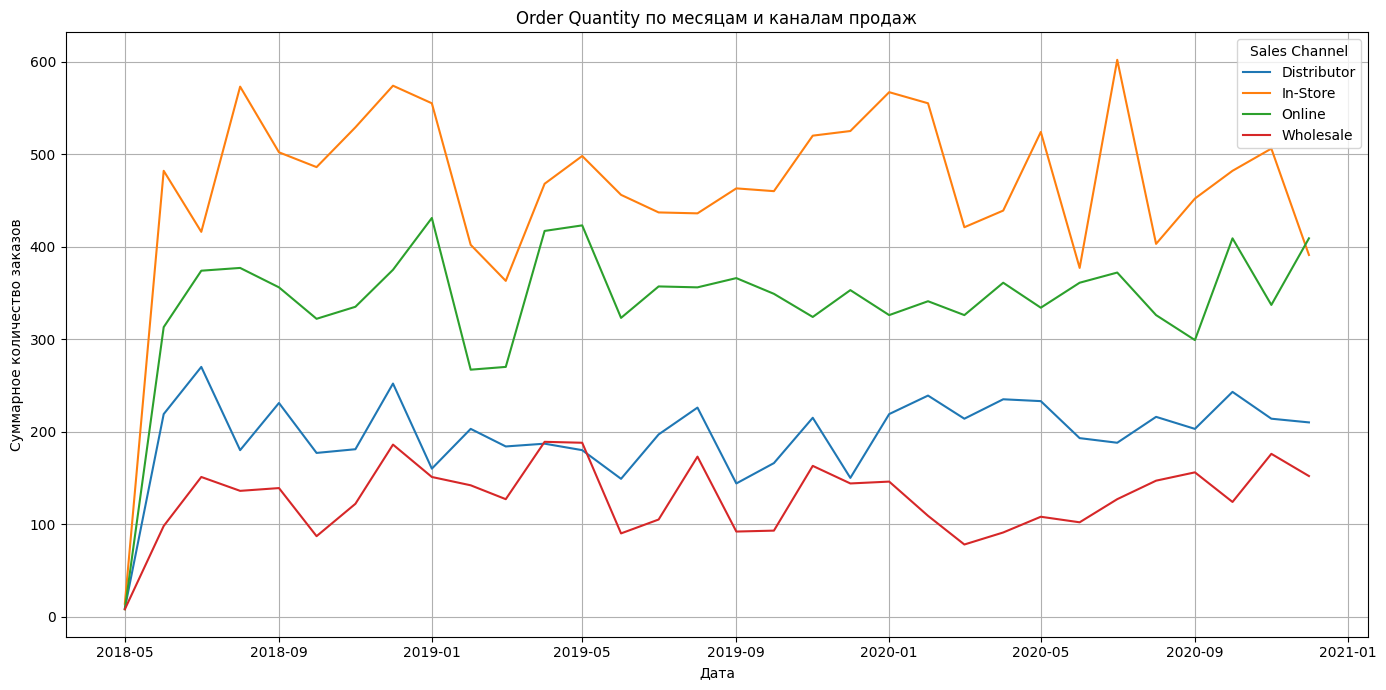

In [100]:
# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ 'Sales Channel' –∏ –º–µ—Å—è—Ü–∞–º: —Å—É–º–º–∞—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤
channel_monthly_series = df.groupby([df['OrderDate'].dt.to_period('M'), 'Sales Channel'])['Order Quantity'].sum().unstack()

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–∞ –æ–±—Ä–∞—Ç–Ω–æ –≤ Timestamp
channel_monthly_series.index = channel_monthly_series.index.to_timestamp()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ –∫–∞–∂–¥–æ–º—É –∫–∞–Ω–∞–ª—É –ø—Ä–æ–¥–∞–∂
plt.figure(figsize=(14, 7))
for column in channel_monthly_series.columns:
    plt.plot(channel_monthly_series.index, channel_monthly_series[column], label=column)

plt.title("Order Quantity –ø–æ –º–µ—Å—è—Ü–∞–º –∏ –∫–∞–Ω–∞–ª–∞–º –ø—Ä–æ–¥–∞–∂")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–°—É–º–º–∞—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤")
plt.legend(title="Sales Channel")
plt.grid(True)
plt.tight_layout()
plt.show()

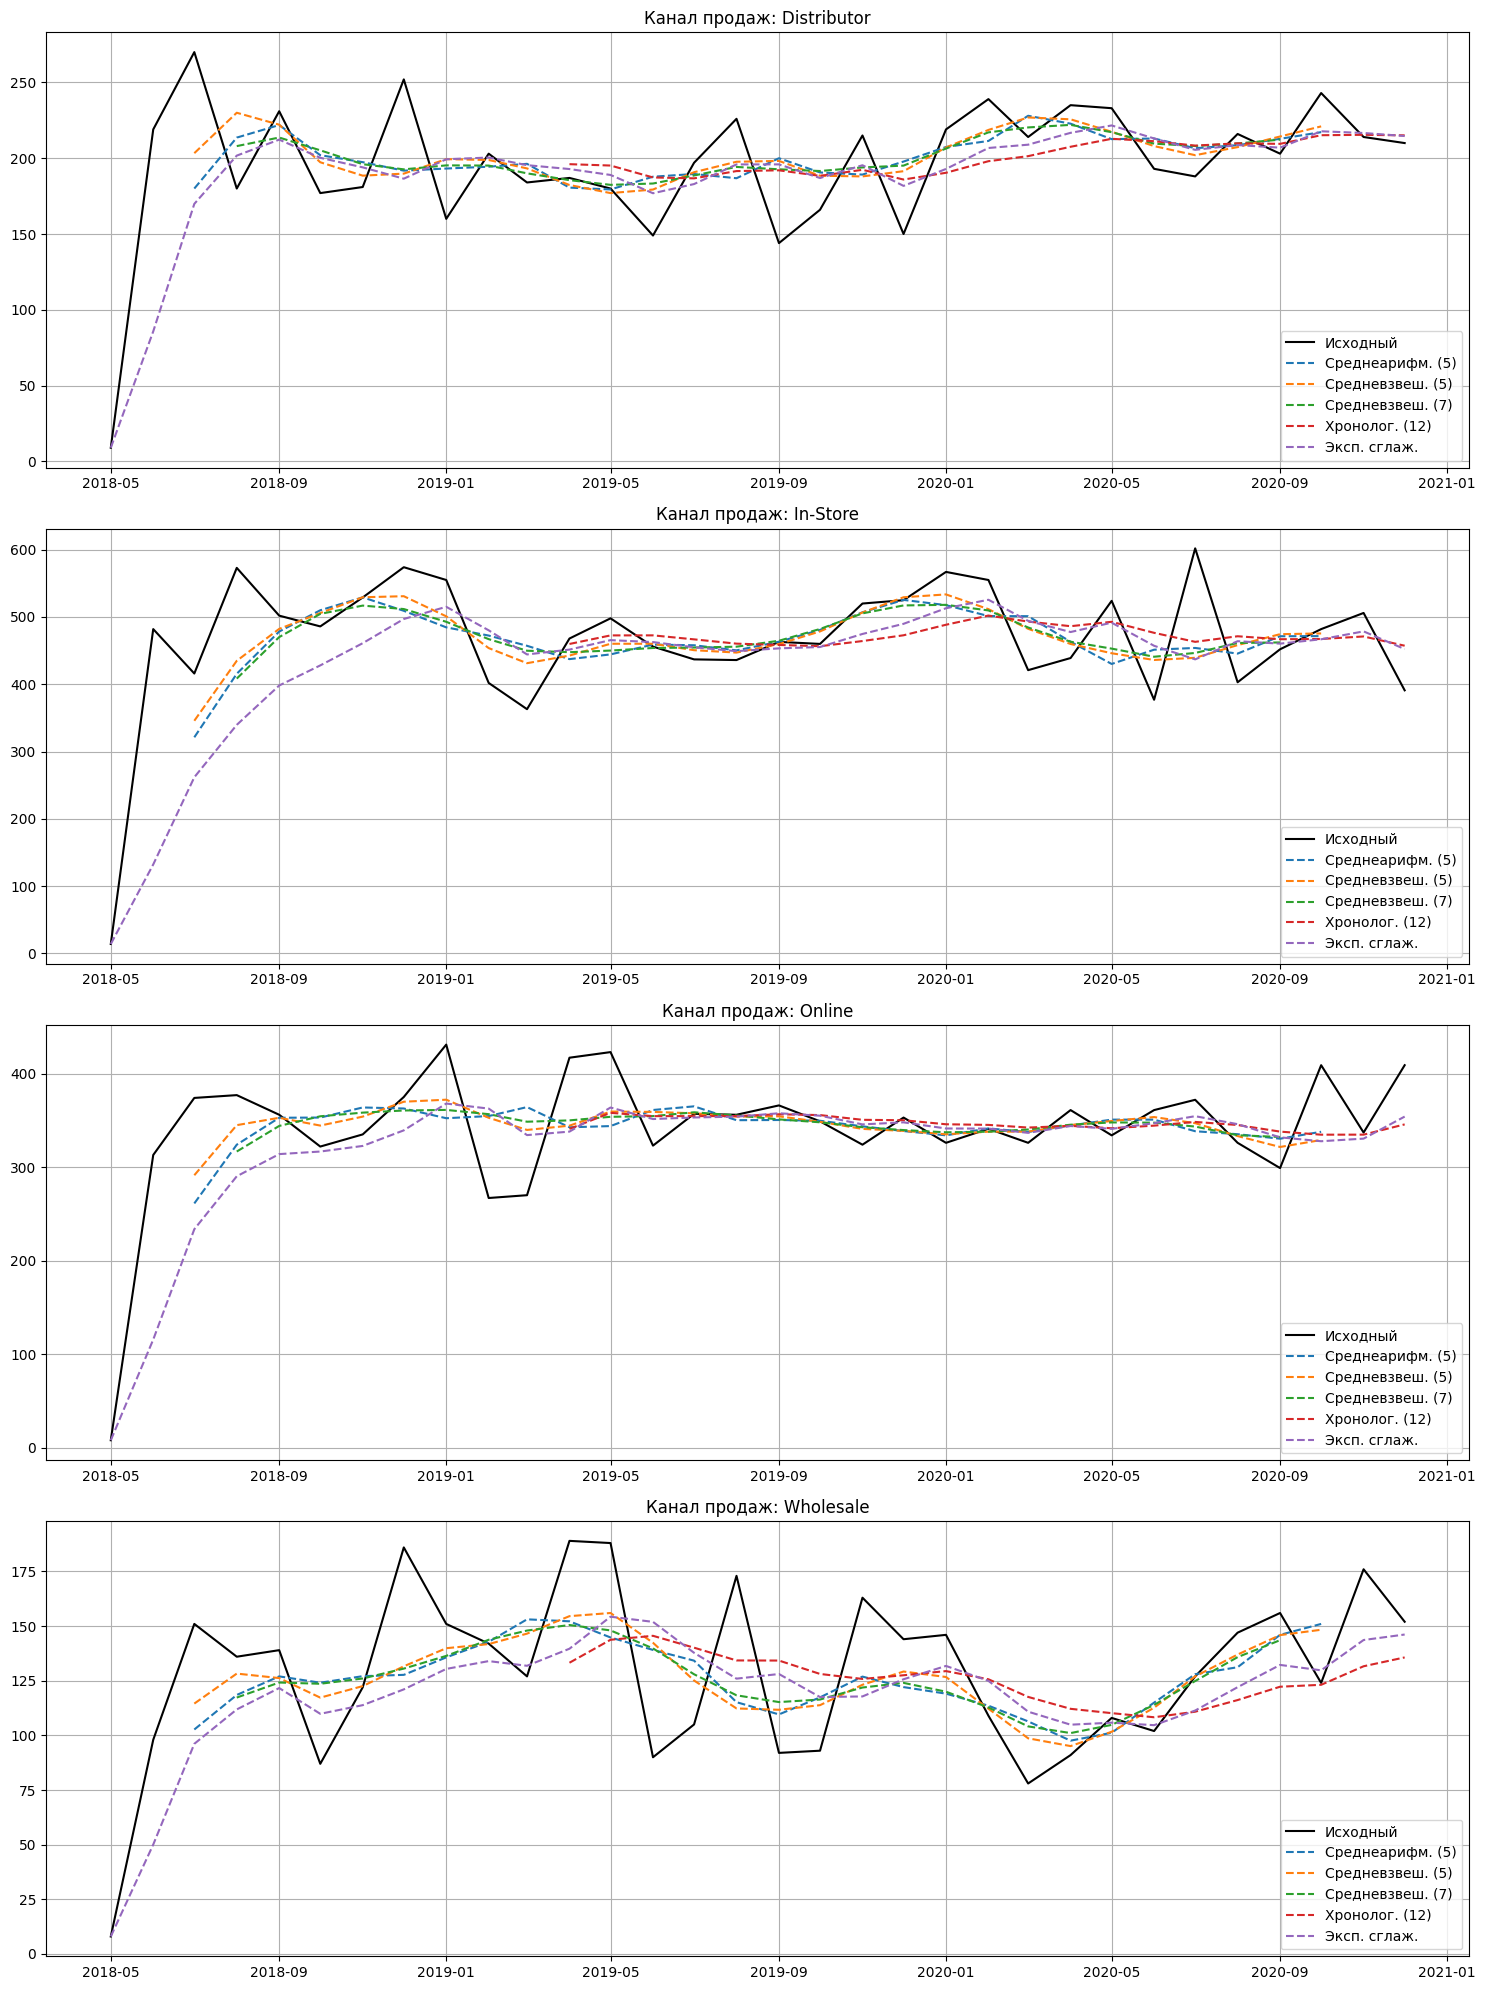

In [101]:
#–ü–æ–≤—Ç–æ—Ä–Ω–∞—è –∞–≥—Ä–µ–≥–∞—Ü–∏—è –ø–æ Sales Channel –∏ –º–µ—Å—è—Ü—É (–≤ —Å–ª—É—á–∞–µ –ø–æ—Ç–µ—Ä–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π)
channel_monthly_series = df.groupby([df['OrderDate'].dt.to_period('M'), 'Sales Channel'])['Order Quantity'].sum().unstack()
channel_monthly_series.index = channel_monthly_series.index.to_timestamp()

# –ü–æ–≤—Ç–æ—Ä –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π —Ä–∞–±–æ—Ç—ã 1 —Å —É—á–µ—Ç–æ–º –≤—Å–µ—Ö –∫–∞–Ω–∞–ª–æ–≤
results = {}

for channel in channel_monthly_series.columns:
    series = channel_monthly_series[channel].copy().fillna(0)

    # –ö—Ä–∏—Ç–µ—Ä–∏–π –ò—Ä–≤–∏–Ω–∞
    diffs = np.abs(series - series.shift(1))
    std = series.std()
    z_scores = diffs / std
    anomalies = z_scores > 1.5

    cleaned = series.copy()
    cleaned[anomalies] = (series.shift(1) + series.shift(-1)) / 2

    # –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
    rolling_5 = cleaned.rolling(5, center=True).mean()
    weights_5 = np.array([1, 2, 3, 2, 1]) / 9
    weighted_5 = cleaned.rolling(5, center=True).apply(lambda x: np.dot(x, weights_5), raw=True)

    weights_7 = np.array([1, 2, 3, 4, 3, 2, 1]) / 16
    weighted_7 = cleaned.rolling(7, center=True).apply(lambda x: np.dot(x, weights_7), raw=True)

    weights_12 = np.arange(1, 13)
    chronological_12 = cleaned.rolling(12).apply(lambda x: np.dot(x, weights_12) / weights_12.sum(), raw=True)

    exp_smooth = cleaned.ewm(alpha=0.3).mean()

    results[channel] = {
        'original': series,
        'cleaned': cleaned,
        'rolling_5': rolling_5,
        'weighted_5': weighted_5,
        'weighted_7': weighted_7,
        'chronological_12': chronological_12,
        'exp_smooth': exp_smooth
    }

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
fig, axes = plt.subplots(nrows=len(results), figsize=(15, 5 * len(results)))

if len(results) == 1:
    axes = [axes]

for ax, (channel, data) in zip(axes, results.items()):
    ax.plot(data['original'], label='–ò—Å—Ö–æ–¥–Ω—ã–π', color='black')
    ax.plot(data['rolling_5'], label='–°—Ä–µ–¥–Ω–µ–∞—Ä–∏—Ñ–º. (5)', linestyle='--')
    ax.plot(data['weighted_5'], label='–°—Ä–µ–¥–Ω–µ–≤–∑–≤–µ—à. (5)', linestyle='--')
    ax.plot(data['weighted_7'], label='–°—Ä–µ–¥–Ω–µ–≤–∑–≤–µ—à. (7)', linestyle='--')
    ax.plot(data['chronological_12'], label='–•—Ä–æ–Ω–æ–ª–æ–≥. (12)', linestyle='--')
    ax.plot(data['exp_smooth'], label='–≠–∫—Å–ø. —Å–≥–ª–∞–∂.', linestyle='--')
    ax.set_title(f"–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: {channel}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# 2 . –û–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ —Ç—Ä–µ–Ω–¥–∞

In [102]:
def check_trend_differences(series):
    n = len(series)
    first_half = series.iloc[:n//2]
    second_half = series.iloc[n//2:]
    mean_first = first_half.mean()
    mean_second = second_half.mean()
    delta = mean_second - mean_first
    print(f"–°—Ä–µ–¥–Ω–µ–µ –ø–µ—Ä–≤–æ–π –ø–æ–ª–æ–≤–∏–Ω—ã: {mean_first:.2f}")
    print(f"–°—Ä–µ–¥–Ω–µ–µ –≤—Ç–æ—Ä–æ–π –ø–æ–ª–æ–≤–∏–Ω—ã: {mean_second:.2f}")
    print(f"–†–∞–∑–Ω–æ—Å—Ç—å: {delta:.2f}")
    # —Ä–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å—Ä–µ–¥–Ω–∏–º–∏ –±–æ–ª—å—à–µ —á–µ–º "—É—Å–ª–æ–≤–Ω–æ –¥–æ–ø—É—Å—Ç–∏–º–∞—è —Å–ª—É—á–∞–π–Ω–∞—è —Ñ–ª—É–∫—Ç—É–∞—Ü–∏—è",
    if np.abs(delta) > series.std() * 0.5:
        print(" –û–±–Ω–∞—Ä—É–∂–µ–Ω —Ç—Ä–µ–Ω–¥ (–ø–æ —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π)")
    else:
        print(" –¢—Ä–µ–Ω–¥ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω (–ø–æ —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π)")

def foster_stewart_test(series):
    """
    –≠—Ç–æ —ç–≤—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥, –ø—Ä–æ—â–µ –ø–æ —Å—É—Ç–∏, –Ω–æ –º–æ—â–Ω—ã–π –¥–ª—è –º–æ–Ω–æ—Ç–æ–Ω–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤ (–ª–∏–Ω–µ–π–Ω—ã—Ö –∏ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö).
    (–∞–Ω–∞–ª–∏–∑ –Ω–æ–≤—ã—Ö –º–∞–∫—Å–∏–º—É–º–æ–≤/–º–∏–Ω–∏–º—É–º–æ–≤)
    """
    P = M = 0
    for i in range(1, len(series)):
        prev_values = series[:i]
        current = series[i]
        if current > prev_values.max():
            P += 1
        elif current < prev_values.min():
            M += 1
    print(f"P (–ø–æ–≤—ã—à–µ–Ω–∏–π): {P}, M (–ø–æ–Ω–∏–∂–µ–Ω–∏–π): {M}")
    d = np.abs(P - M)
    print(f"–†–∞–∑–Ω–æ—Å—Ç—å |P - M| = {d}")
    # –ü—Ä–æ—Å—Ç–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –µ—Å–ª–∏ d > sqrt(n), —Ç–æ –≤–æ–∑–º–æ–∂–µ–Ω —Ç—Ä–µ–Ω–¥
    if d > np.sqrt(len(series)):
        print(" –û–±–Ω–∞—Ä—É–∂–µ–Ω —Ç—Ä–µ–Ω–¥ (–ø–æ –º–µ—Ç–æ–¥—É –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞)")
    else:
        print(" –¢—Ä–µ–Ω–¥ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω (–ø–æ –º–µ—Ç–æ–¥—É –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞)")

def foster_stuart_variant1(series):
    """
    –≠—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è, –ø—Ä–∏–º–µ–Ω–∏–º–∞—è –∫ —Ä—è–¥–∞–º —Å —à—É–º–æ–º ‚Äî —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤ –∏ —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç–∏.
    –ê–Ω–∞–ª–∏–∑ —Å–º–µ–Ω—ã –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏–π)
    """
    diffs = np.diff(series)
    signs = np.sign(diffs)

    # –ü–æ–¥—Å—á—ë—Ç —Å–º–µ–Ω –∑–Ω–∞–∫–æ–≤
    U = np.sum(signs[1:] != signs[:-1])
    S = np.sum(signs != 0)

    if S < 2:
        print("–ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–Ω—É–ª–µ–≤—ã—Ö –ø—Ä–∏—Ä–∞—â–µ–Ω–∏–π –¥–ª—è –æ—Ü–µ–Ω–∫–∏.")
        return

    # –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–µ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è
    E_U = (2 * S - 1) / 3
    sigma_U = np.sqrt((16 * S - 29) / 90)
    Z = (U - E_U) / sigma_U

    # –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    print(f" –ú–µ—Ç–æ–¥ –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞ (–∞–Ω–∞–ª–∏–∑ —Å–º–µ–Ω –∑–Ω–∞–∫–æ–≤):")
    print(f"  –ö–æ–ª-–≤–æ —Å–º–µ–Ω –∑–Ω–∞–∫–æ–≤: U = {U}")
    print(f"  –ö–æ–ª-–≤–æ –Ω–µ–Ω—É–ª–µ–≤—ã—Ö –ø—Ä–∏—Ä–∞—â–µ–Ω–∏–π: S = {S}")
    print(f"  –û–∂–∏–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ E[U] = {E_U:.2f}")
    print(f"  –°—Ç. –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ œÉ[U] = {sigma_U:.2f}")
    print(f"  Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {Z:.3f}")

    # –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
    alpha = 1.96  # –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è 95%
    if np.abs(Z) > alpha:
        print(" –¢—Ä–µ–Ω–¥ –æ–±–Ω–∞—Ä—É–∂–µ–Ω (Z –≤—ã—Ö–æ–¥–∏—Ç –∑–∞ –ø—Ä–µ–¥–µ–ª—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞)")
    else:
        print(" –¢—Ä–µ–Ω–¥ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω (Z –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞)")

In [103]:
unique_sales = df['Sales Channel'].unique()

for name in unique_sales:
    # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
    print(f"NAME {name}")
    series = channel_monthly_series[name].fillna(0)

    # –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤
    print("üîπ –ú–µ—Ç–æ–¥ —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π:")
    check_trend_differences(series)

    print("üîπ –ú–µ—Ç–æ–¥ –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞:")
    foster_stewart_test(series)

    print("üîπ –ú–µ—Ç–æ–¥ –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞:")
    foster_stuart_variant1(series)
    print("\n")

NAME In-Store
üîπ –ú–µ—Ç–æ–¥ —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π:
–°—Ä–µ–¥–Ω–µ–µ –ø–µ—Ä–≤–æ–π –ø–æ–ª–æ–≤–∏–Ω—ã: 449.44
–°—Ä–µ–¥–Ω–µ–µ –≤—Ç–æ—Ä–æ–π –ø–æ–ª–æ–≤–∏–Ω—ã: 480.44
–†–∞–∑–Ω–æ—Å—Ç—å: 31.00
 –¢—Ä–µ–Ω–¥ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω (–ø–æ —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π)
üîπ –ú–µ—Ç–æ–¥ –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞:
P (–ø–æ–≤—ã—à–µ–Ω–∏–π): 4, M (–ø–æ–Ω–∏–∂–µ–Ω–∏–π): 0
–†–∞–∑–Ω–æ—Å—Ç—å |P - M| = 4
 –¢—Ä–µ–Ω–¥ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω (–ø–æ –º–µ—Ç–æ–¥—É –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞)
üîπ –ú–µ—Ç–æ–¥ –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞:
 –ú–µ—Ç–æ–¥ –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞ (–∞–Ω–∞–ª–∏–∑ —Å–º–µ–Ω –∑–Ω–∞–∫–æ–≤):
  –ö–æ–ª-–≤–æ —Å–º–µ–Ω –∑–Ω–∞–∫–æ–≤: U = 17
  –ö–æ–ª-–≤–æ –Ω–µ–Ω—É–ª–µ–≤—ã—Ö –ø—Ä–∏—Ä–∞—â–µ–Ω–∏–π: S = 31
  –û–∂–∏–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ E[U] = 20.33
  –°—Ç. –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ œÉ[U] = 2.28
  Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = -1.463
 –¢—Ä–µ–Ω–¥ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω (Z –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞)


NAME Onli

In [104]:
series = pd.Series([100, 102, 105, 107, 110, 112, 115, 117])
check_trend_differences(series)
series.std()

–°—Ä–µ–¥–Ω–µ–µ –ø–µ—Ä–≤–æ–π –ø–æ–ª–æ–≤–∏–Ω—ã: 103.50
–°—Ä–µ–¥–Ω–µ–µ –≤—Ç–æ—Ä–æ–π –ø–æ–ª–æ–≤–∏–Ω—ã: 113.50
–†–∞–∑–Ω–æ—Å—Ç—å: 10.00
 –û–±–Ω–∞—Ä—É–∂–µ–Ω —Ç—Ä–µ–Ω–¥ (–ø–æ —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π)


6.07100838882165

## –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ 3 –í–´–î–ï–õ–ï–ù–ò–ï –ö–û–ú–ü–û–ù–ï–ù–¢ –¢–†–ï–ù–î-–°–ï–ó–û–ù–ù–û–ì–û

```
–î–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞–¥–∞–Ω–∏—è –ø–æ –≤—ã–¥–µ–ª–µ–Ω–∏—é –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ Yt‚Äî —Ç—Ä–µ–Ω–¥–∞ Ut-—Å–µ–∑–æ–Ω–Ω–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã Vt –∏ –æ—Å—Ç–∞—Ç–∫–∞ Œµt 
–∞–¥–¥–∏—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å: Yt = Ut + Vt + Œµt
```

In [105]:
# –ê–≥–≥—Ä–µ–≥–∏—Ä—É–µ–º –ø–æ –º–µ—Å—è—Ü–∞–º –∏ –∫–∞–Ω–∞–ª–∞–º
monthly = df.groupby([df['OrderDate'].dt.to_period('M'), 'Sales Channel'])['Order Quantity'].sum().unstack()
monthly.index = monthly.index.to_timestamp()
monthly = monthly.fillna(0)

results = {}

for channel in monthly.columns:
    Yt = monthly[channel]
    
    # –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π —Ç—Ä–µ–Ω–¥: —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ
    trend_rough = Yt.rolling(12, center=True).mean()
    
    # –û—Å—Ç–∞—Ç–∫–∏ (–¥–ª—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏)
    detrended = Yt - trend_rough
    
    # 1-—è —Å–µ–∑–æ–Ω–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞
    seasonal_wave = detrended.groupby(detrended.index.month).mean()
    seasonal = Yt.index.month.map(seasonal_wave.to_dict())
    seasonal = pd.Series(seasonal, index=Yt.index)
    
    # 2-–π —Ç—Ä–µ–Ω–¥: Yt - —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å ‚Üí —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ
    Y_minus_seasonal = Yt - seasonal
    trend_refined = Y_minus_seasonal.rolling(12, center=True).mean()
    
    # –û—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞
    residual = Yt - trend_refined - seasonal

    results[channel] = {
        'original': Yt,
        'trend_rough': trend_rough,
        'seasonal': seasonal,
        'trend_refined': trend_refined,
        'residual': residual,
        'seasonal_wave': seasonal_wave
    }

monthly

Sales Channel  Distributor  In-Store  Online  Wholesale
OrderDate                                              
2018-05-01               9        14       8          8
2018-06-01             219       482     313         98
2018-07-01             270       416     374        151
2018-08-01             180       573     377        136
2018-09-01             231       502     356        139
2018-10-01             177       486     322         87
2018-11-01             181       529     335        122
2018-12-01             252       574     375        186
2019-01-01             160       555     431        151
2019-02-01             203       402     267        142
2019-03-01             184       363     270        127
2019-04-01             187       468     417        189
2019-05-01             180       498     423        188
2019-06-01             149       456     323         90
2019-07-01             197       437     357        105
2019-08-01             226       436     356        173
2019-09-01             144       463     366         92
2019-10-01             166       460     349         93
2019-11-01             215       520     324        163
2019-12-01             150       525     353        144
2020-01-01             219       567     326        146
2020-02-01             239       555     341        109
2020-03-01             214       421     326         78
2020-04-01             235       439     361         91
2020-05-01             233       524     334        108
2020-06-01             193       377     361        102
2020-07-01             188       602     372        127
2020-08-01             216       403     326        147
2020-09-01             203       452     299        156
2020-10-01             243       482     409        124
2020-11-01             214       506     337        176
2020-12-01             210       391     409        152

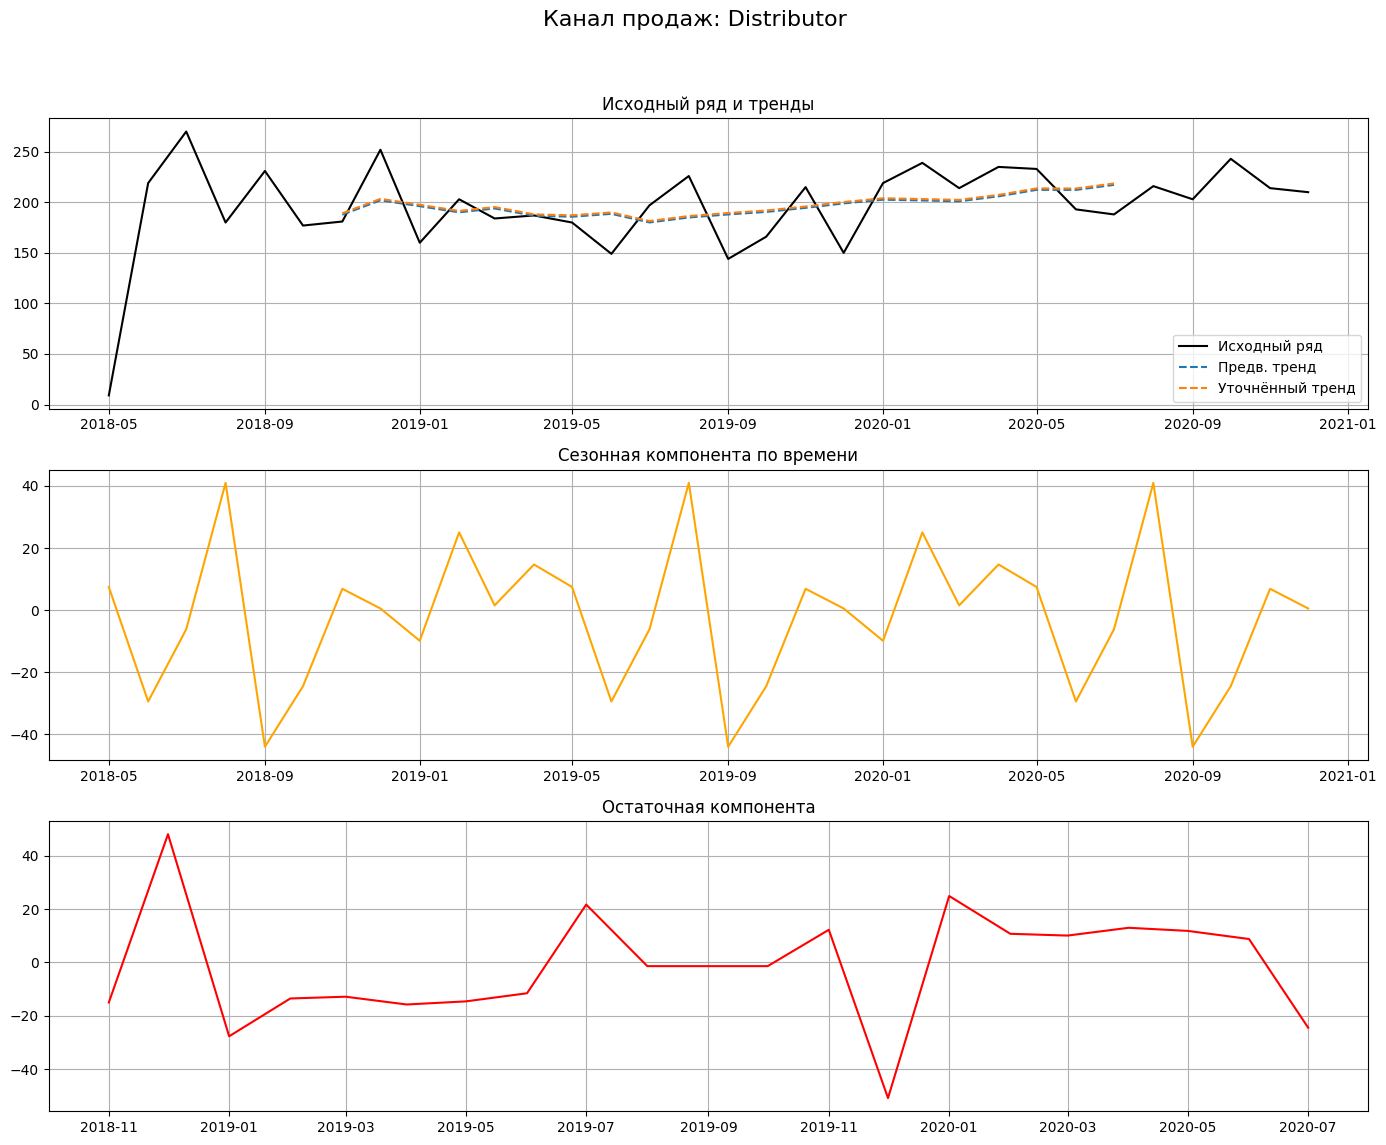

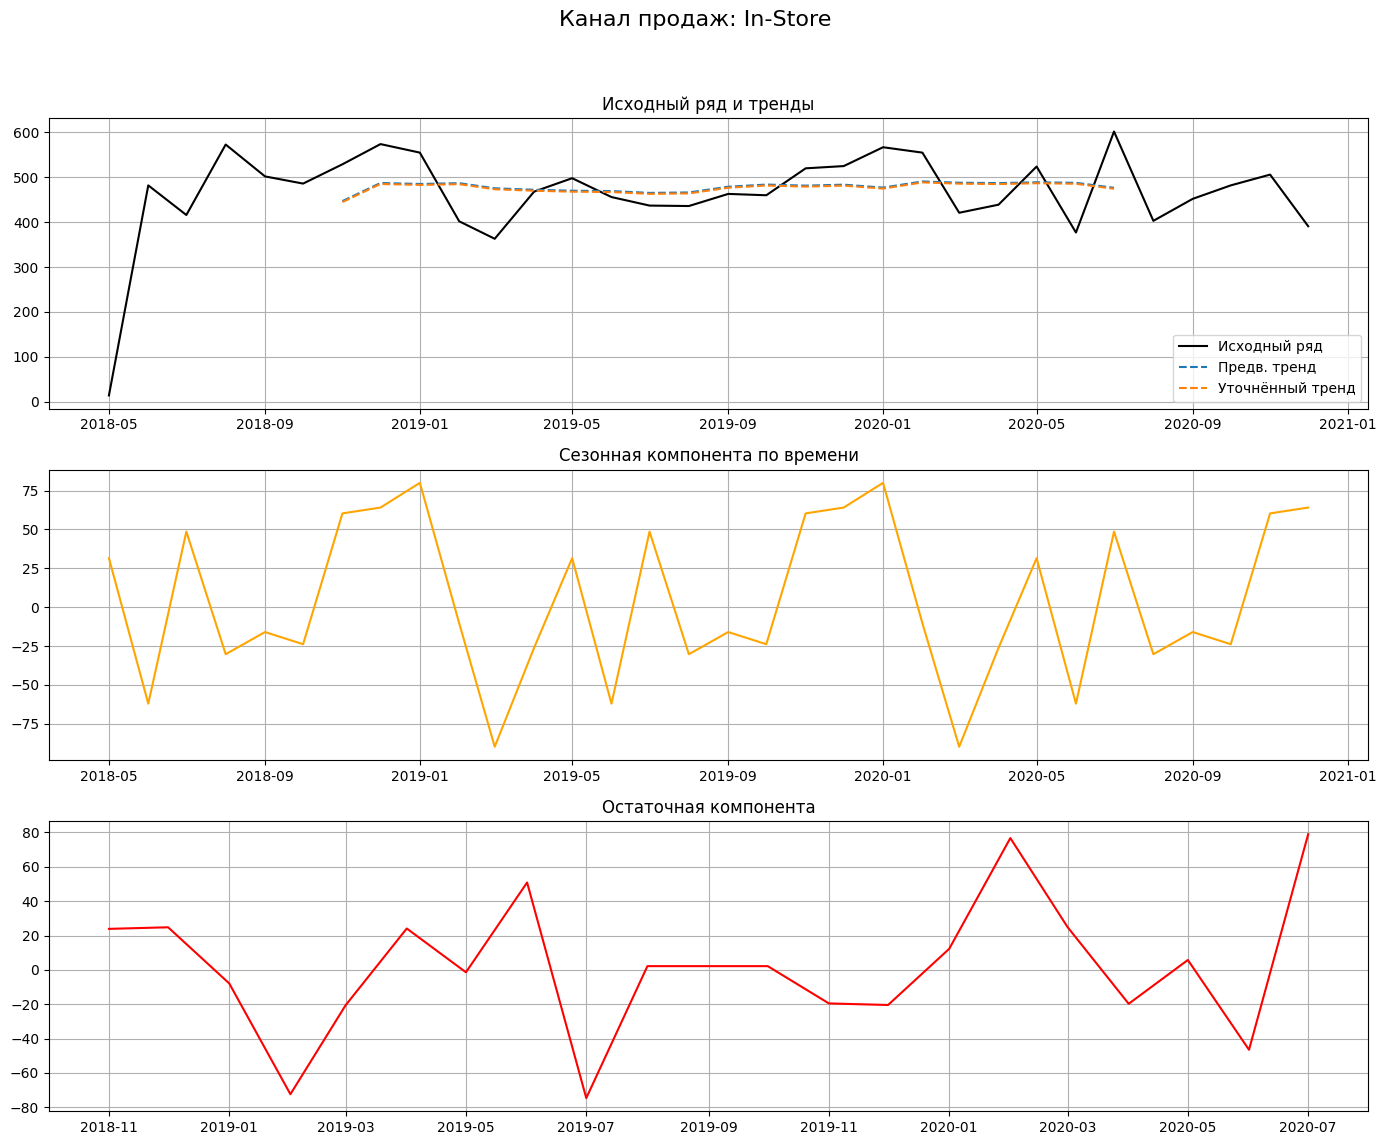

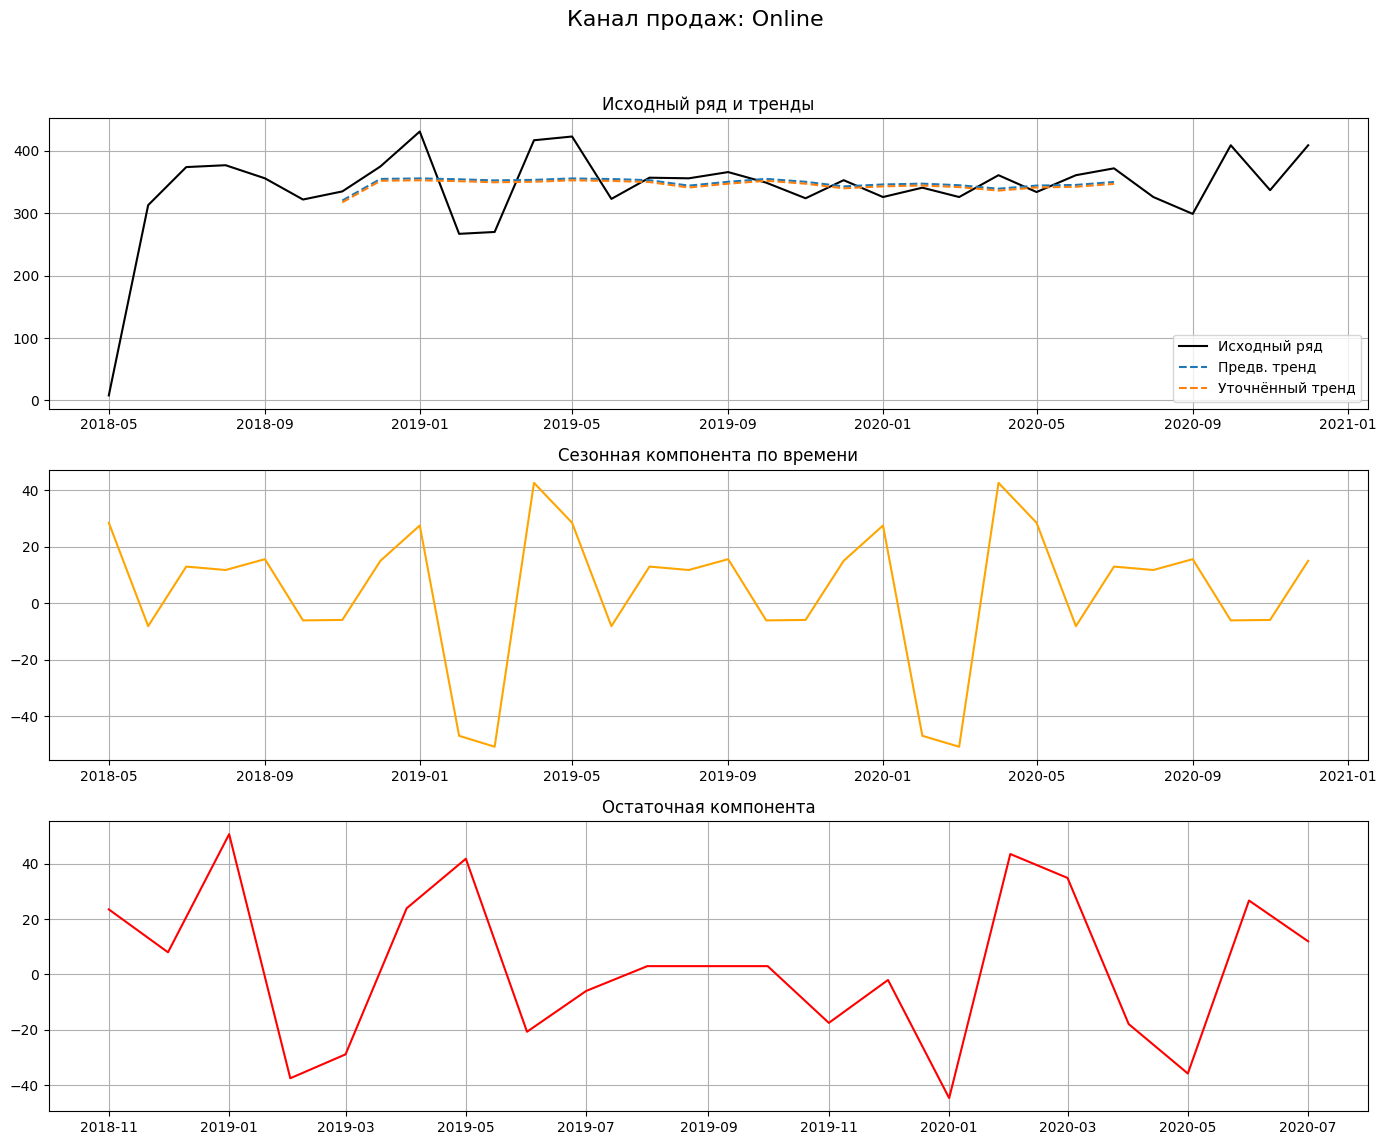

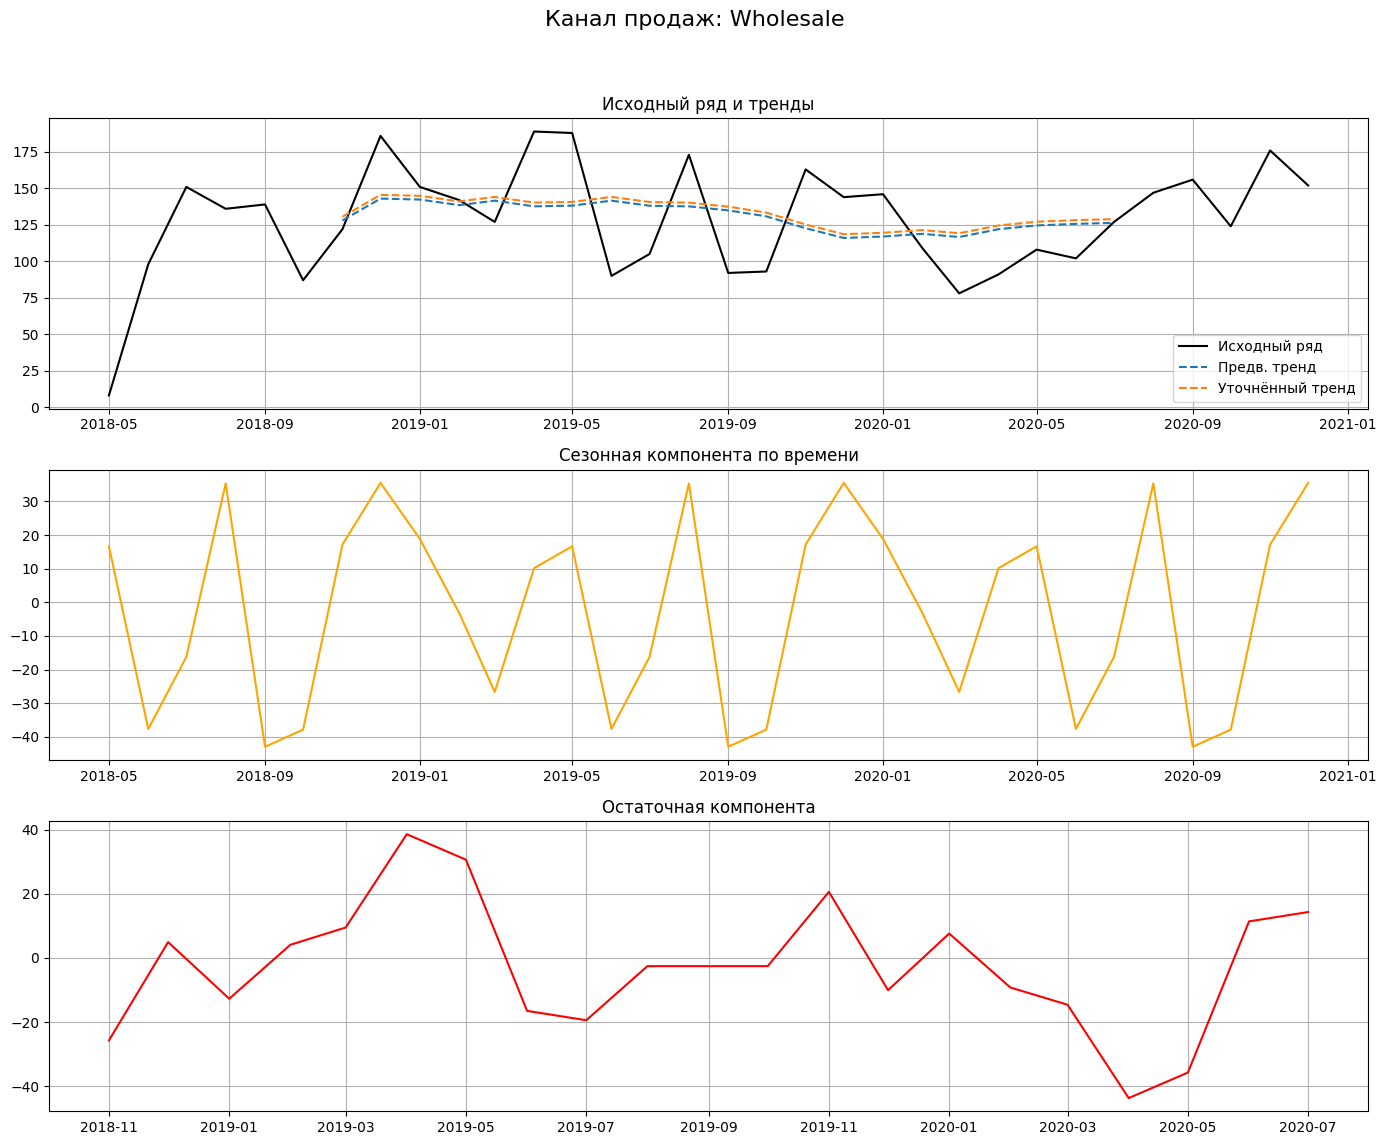

In [106]:
figs = []
for channel, data in results.items():
    fig, axs = plt.subplots(3, 1, figsize=(14, 12))
    fig.suptitle(f'–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: {channel}', fontsize=16)

    axs[0].plot(data['original'], label='–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥', color='black')
    axs[0].plot(data['trend_rough'], label='–ü—Ä–µ–¥–≤. —Ç—Ä–µ–Ω–¥', linestyle='--')
    axs[0].plot(data['trend_refined'], label='–£—Ç–æ—á–Ω—ë–Ω–Ω—ã–π —Ç—Ä–µ–Ω–¥', linestyle='--')
    axs[0].legend()
    axs[0].set_title("–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥ –∏ —Ç—Ä–µ–Ω–¥—ã")
    axs[0].grid(True)

    axs[1].plot(data['seasonal'], label='–°–µ–∑–æ–Ω–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞', color='orange')
    axs[1].set_title("–°–µ–∑–æ–Ω–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ –ø–æ –≤—Ä–µ–º–µ–Ω–∏")
    axs[1].grid(True)

    axs[2].plot(data['residual'], label='–û—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞', color='red')
    axs[2].set_title("–û—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
    axs[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    figs.append(fig)

plt.show()

# 4 ‚Äî –≤—ã–±–æ—Ä –∫—Ä–∏–≤–æ–π —Ä–æ—Å—Ç–∞ –∏ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

In [107]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Å–ª–æ–≤–∞—Ä—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –º–æ–¥–µ–ª–µ–π
growth_models = {}

# –í—Ä–µ–º–µ–Ω–Ω–∞—è —à–∫–∞–ª–∞
t_values = np.arange(len(monthly))

# monthly = monthly.iloc[1:]

# # –í—Ä–µ–º–µ–Ω–Ω–∞—è —à–∫–∞–ª–∞
# t_values = np.arange(1, len(monthly)+1)

for channel in monthly.columns:
    Y = monthly[channel].values

    print(Y)

    # –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –ø–æ 3 —Ç–æ—á–∫–∞–º (—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ)
    Y_smooth = pd.Series(Y).rolling(3, center=True).mean().to_numpy()

    # –ò—Å–∫–ª—é—á–∞–µ–º NaN –∏–∑ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –∏ –ø–æ–¥–≥–æ–Ω—è–µ–º t
    mask = ~np.isnan(Y_smooth)
    t_valid = t_values[mask]
    Y_valid = Y_smooth[mask]

    # –õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å: y = a + bt
    coeffs_linear = np.polyfit(t_valid, Y_valid, 1)
    linear_model = np.poly1d(coeffs_linear)

    # –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å: y = a * exp(bt)
    def exp_func(t, a, b):
        return a * np.exp(b * t)

    try:
        popt, _ = curve_fit(exp_func, t_valid, Y_valid, maxfev=10000)
        exp_model = lambda t: exp_func(t, *popt)
    except RuntimeError:
        exp_model = None

    growth_models[channel] = {
        't': t_valid,
        'Y': Y, 
        'Y_smooth': Y_valid,
        'linear_model': linear_model,
        'exp_model': exp_model,
        'coeffs_linear': coeffs_linear,
        'coeffs_exp': popt if exp_model else None
    }

[  9 219 270 180 231 177 181 252 160 203 184 187 180 149 197 226 144 166
 215 150 219 239 214 235 233 193 188 216 203 243 214 210]
[ 14 482 416 573 502 486 529 574 555 402 363 468 498 456 437 436 463 460
 520 525 567 555 421 439 524 377 602 403 452 482 506 391]
[  8 313 374 377 356 322 335 375 431 267 270 417 423 323 357 356 366 349
 324 353 326 341 326 361 334 361 372 326 299 409 337 409]
[  8  98 151 136 139  87 122 186 151 142 127 189 188  90 105 173  92  93
 163 144 146 109  78  91 108 102 127 147 156 124 176 152]


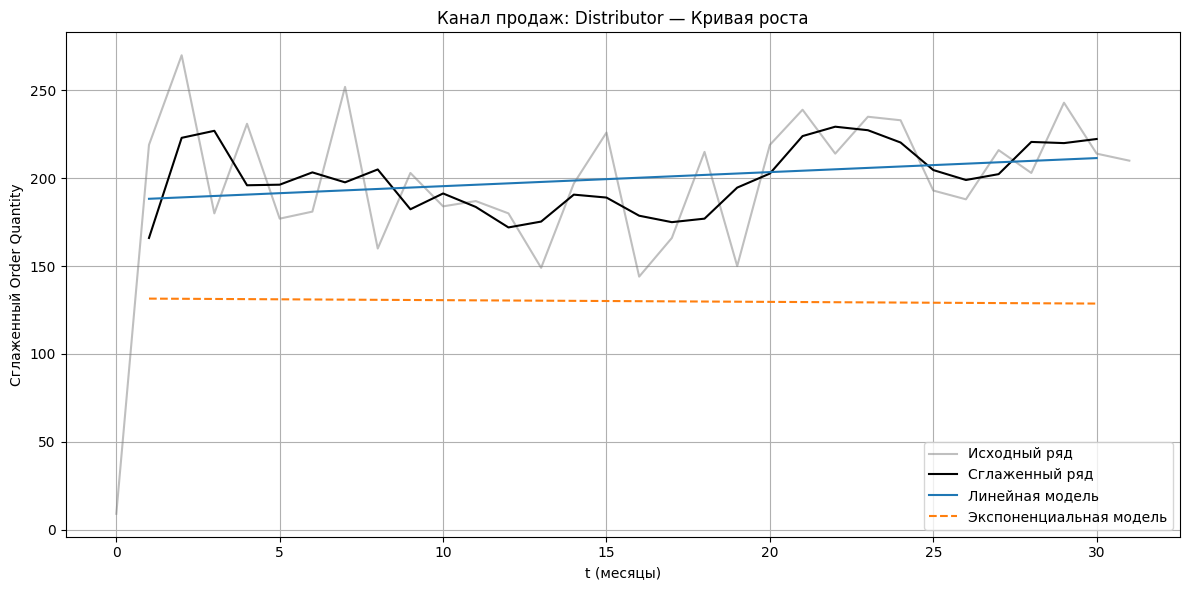

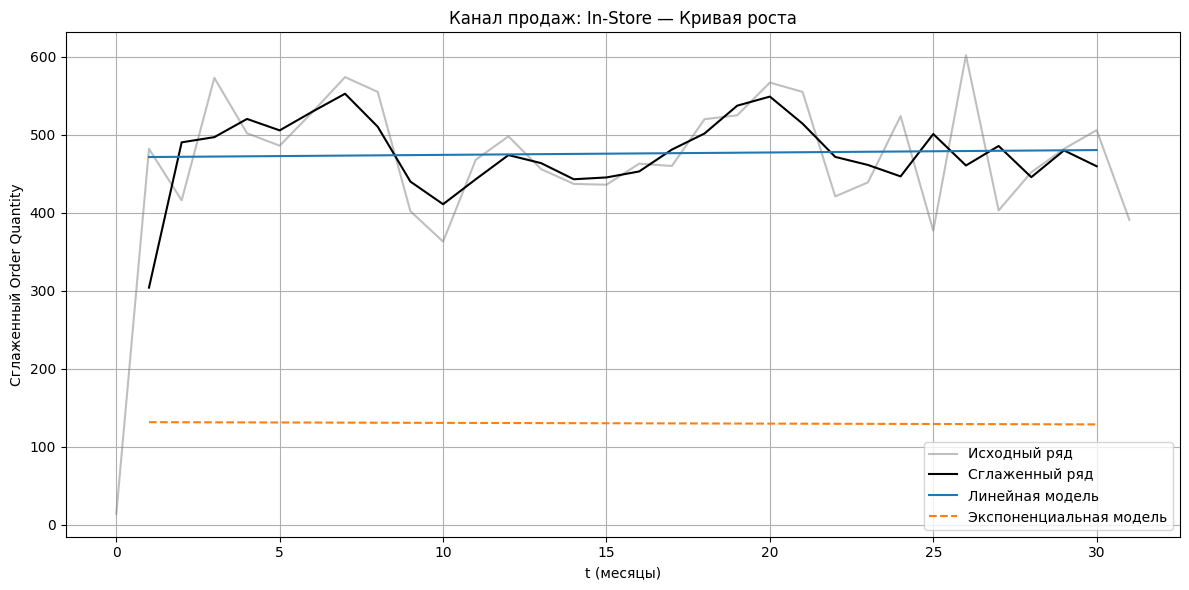

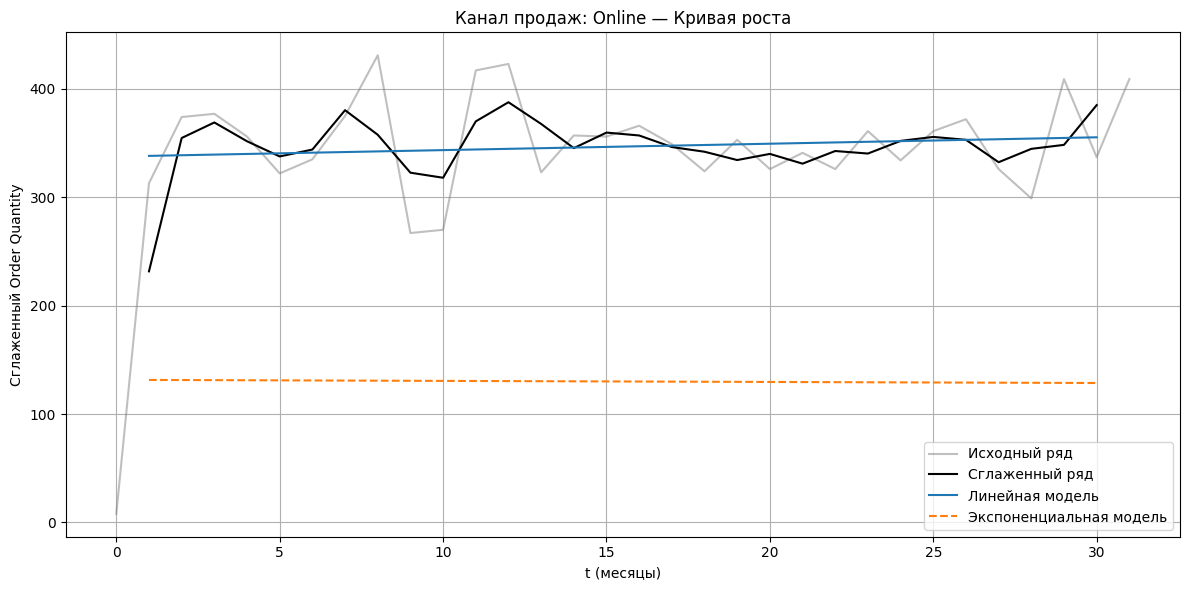

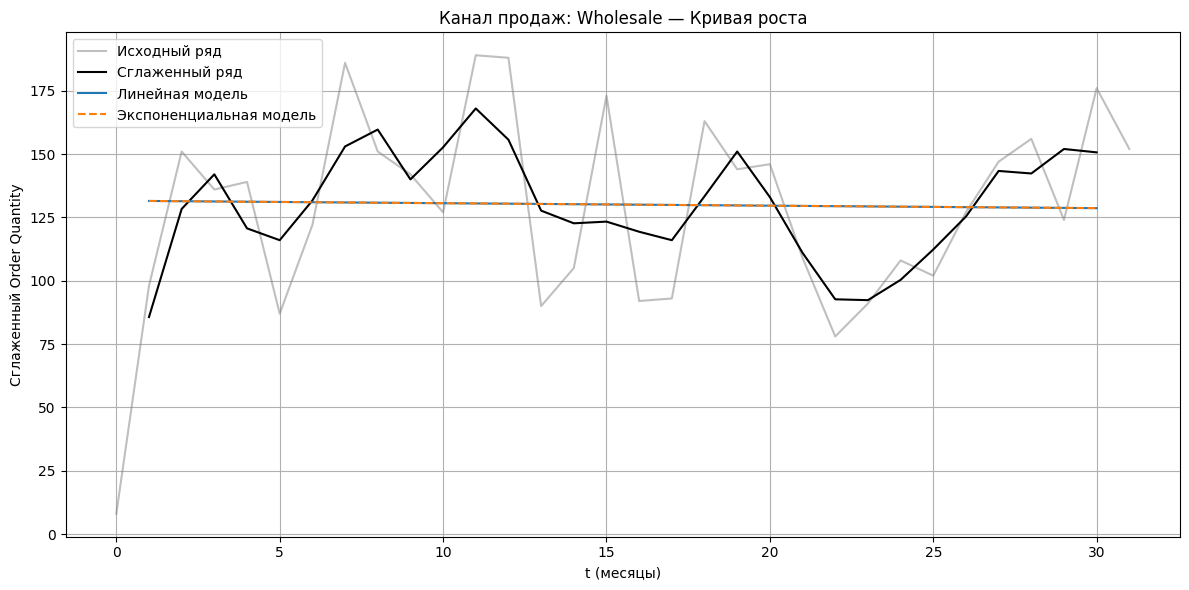

In [ ]:
figs = []
for channel, data in growth_models.items():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(t_values, monthly[channel].values, label='–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥', color='gray', alpha=0.5)
    ax.plot(data['t'], data['Y_smooth'], label='–°–≥–ª–∞–∂–µ–Ω–Ω—ã–π —Ä—è–¥', color='black')
    ax.plot(data['t'], data['linear_model'](data['t']), label='–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å', linestyle='-')
    if data['exp_model']:
        ax.plot(data['t'], data['exp_model'](data['t']), label='–≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å', linestyle='--')
    ax.set_title(f'–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: {channel} ‚Äî –ö—Ä–∏–≤–∞—è —Ä–æ—Å—Ç–∞')
    ax.set_xlabel("t (–º–µ—Å—è—Ü—ã)")
    ax.set_ylabel("–°–≥–ª–∞–∂–µ–Ω–Ω—ã–π Order Quantity")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    figs.append(fig)

plt.show()

In [120]:
df.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17 2018-05-31  14/6/18   
1  SO - 000102        Online  WARE-NMK1003     31/12/17 2018-05-31  22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17 2018-05-31  21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17 2018-05-31   2/6/18   
4  SO - 000105   Distributor  WARE-NMK1003      10/4/18 2018-05-31  16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0      19/6/18          USD             6           15       259          12   
1       2/7/18          USD            14           20       196          27   
2       1/7/18          USD            21           16       213          16   
3       7/6/18          USD            28           48       107          23   
4      26/6/18          USD            22           49       111          26   

   Order Quantity  Discount Applied  Unit Cost  Unit Price  
0               5             0.075    1001.18      1963.1  
1               3             0.075    3348.66      3939.6  
2               1             0.050     781.22      1775.5  
3               8             0.075    1464.69      2324.9  
4               8             0.100    1476.14      1822.4

# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ 5 –û–¶–ï–ù–ö–ê –ê–î–ï–ö–í–ê–¢–ù–û–°–¢–ò –¢–†–ï–ù–î–û–í–û–ô –ú–û–î–ï–õ–ò

In [109]:
adequacy_results = {}

for channel in results:
    residual = results[channel]['residual'].dropna()

    # –ö—Ä–∏—Ç–µ—Ä–∏–π –ø–∏–∫–æ–≤
    peaks = sum((residual.shift(1) < residual) & (residual.shift(-1) < residual))

    # –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–µ—Ä–∏–π (—á–µ—Ä–µ–¥–æ–≤–∞–Ω–∏—è –∑–Ω–∞–∫–æ–≤)
    signs = np.sign(residual)
    runs = np.sum(signs[1:].values != signs[:-1].values) + 1

    # –ê—Å–∏–º–º–µ—Ç—Ä–∏—è –∏ —ç–∫—Å—Ü–µ—Å—Å
    skewness = skew(residual)
    excess_kurt = kurtosis(residual)

    # –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = 0 ?
    t_stat, p_value = ttest_1samp(residual, 0)

    # –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è: –∫—Ä–∏—Ç–µ—Ä–∏–π –î–∞—Ä–±–∏–Ω–∞-–£–æ—Ç—Å–æ–Ω–∞
    dw_stat = durbin_watson(residual)

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º
    adequacy_results[channel] = {
        '–ü–∏–∫–∏': peaks,
        '–°–µ—Ä–∏–∏': runs,
        '–ê—Å–∏–º–º–µ—Ç—Ä–∏—è': round(skewness, 3),
        '–≠–∫—Å—Ü–µ—Å—Å': round(excess_kurt, 3),
        't-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞': round(t_stat, 3),
        'p-–∑–Ω–∞—á–µ–Ω–∏–µ (t)': round(p_value, 3),
        '–î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω': round(dw_stat, 3)
    }

# –í—ã–≤–æ–¥
for channel, metrics in adequacy_results.items():
    print(f"\n–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: {channel}")
    for k, v in metrics.items():
        print(f"{k}: {v}")


–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: Distributor
–ü–∏–∫–∏: 6
–°–µ—Ä–∏–∏: 9
–ê—Å–∏–º–º–µ—Ç—Ä–∏—è: 0.0
–≠–∫—Å—Ü–µ—Å—Å: 0.398
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: -0.298
p-–∑–Ω–∞—á–µ–Ω–∏–µ (t): 0.768
–î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 2.458

–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: In-Store
–ü–∏–∫–∏: 6
–°–µ—Ä–∏–∏: 13
–ê—Å–∏–º–º–µ—Ç—Ä–∏—è: 0.0
–≠–∫—Å—Ü–µ—Å—Å: -0.005
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 0.248
p-–∑–Ω–∞—á–µ–Ω–∏–µ (t): 0.806
–î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 2.017

–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: Online
–ü–∏–∫–∏: 5
–°–µ—Ä–∏–∏: 9
–ê—Å–∏–º–º–µ—Ç—Ä–∏—è: 0.0
–≠–∫—Å—Ü–µ—Å—Å: -1.037
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 0.487
p-–∑–Ω–∞—á–µ–Ω–∏–µ (t): 0.631
–î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 2.159

–ö–∞–Ω–∞–ª –ø—Ä–æ–¥–∞–∂: Wholesale
–ü–∏–∫–∏: 4
–°–µ—Ä–∏–∏: 10
–ê—Å–∏–º–º–µ—Ç—Ä–∏—è: -0.0
–≠–∫—Å—Ü–µ—Å—Å: -0.254
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: -0.576
p-–∑–Ω–∞—á–µ–Ω–∏–µ (t): 0.571
–î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 1.21


–ö—Ä–∏—Ç–µ—Ä–∏–∏ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç–∏:
* –ú–æ–¥–µ–ª—å —Å—á–∏—Ç–∞–µ—Ç—Å—è –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π, –µ—Å–ª–∏ –æ—Å—Ç–∞—Ç–∫–∏:
* –°–ª—É—á–∞–π–Ω—ã (–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —á–µ—Ä–µ–¥–æ–≤–∞–Ω–∏–µ —Å–µ—Ä–∏–π, —É–º–µ—Ä–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ –ø–∏–∫–æ–≤);
* –ò–º–µ—é—Ç –Ω—É–ª–µ–≤–æ–µ —Å—Ä–µ–¥–Ω–µ–µ (t-—Ç–µ—Å—Ç, p > 0.05);
* –ù–µ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã (–î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω ‚âà 2);
* –ù–µ –∏–º–µ—é—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ —ç–∫—Å—Ü–µ—Å—Å–∞ (–±–ª–∏–∑–∫–æ –∫ 0).

Distributor
* –ü–∏–∫–∏: –≤ –¥–æ–ø—É—Å—Ç–∏–º—ã—Ö –ø—Ä–µ–¥–µ–ª–∞—Ö.
* –°–µ—Ä–∏–∏: 9 ‚Äî —É–º–µ—Ä–µ–Ω–Ω–æ.
* –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: 0.0.
* –≠–∫—Å—Ü–µ—Å—Å: +0.398 (—Å–ª–µ–≥–∫–∞ –±–æ–ª–µ–µ ¬´–æ—Å—Ç—Ä—ã–µ¬ª –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–æ –¥–æ–ø—É—Å—Ç–∏–º–æ).
* t-—Ç–µ—Å—Ç: p = 0.768 ‚Äî –Ω–µ—Ç —Å–º–µ—â–µ–Ω–∏—è.
* –î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 2.458 ‚Äî –≤–æ–∑–º–æ–∂–Ω–∞ –ª—ë–≥–∫–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, –Ω–æ –≤ –Ω–æ—Ä–º–µ.
* –í—ã–≤–æ–¥: –º–æ–¥–µ–ª—å –∞–¥–µ–∫–≤–∞—Ç–Ω–∞.

In-Store
* –ü–∏–∫–∏:  6 ‚Äî –æ–∫.
* –°–µ—Ä–∏–∏: 13 ‚Äî –æ—Ç–ª–∏—á–Ω–æ.
* –ê—Å–∏–º–º–µ—Ç—Ä–∏—è / –≠–∫—Å—Ü–µ—Å—Å: –ø–æ—á—Ç–∏ 0.
* t-—Ç–µ—Å—Ç: p = 0.806.
* –î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 2.017 ‚Äî –∏–¥–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ.
* –í—ã–≤–æ–¥: –º–æ–¥–µ–ª—å –ø–æ–ª–Ω–æ—Å—Ç—å—é –∞–¥–µ–∫–≤–∞—Ç–Ω–∞.

Online
* –ü–∏–∫–∏ –∏ —Å–µ—Ä–∏–∏: –¥–æ–ø—É—Å—Ç–∏–º–æ.
* –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: 0.0.
* –≠–∫—Å—Ü–µ—Å—Å: -1.037 ‚Äî –ø–ª–æ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (–º–µ–Ω—å—à–µ –≤—ã–±—Ä–æ—Å–æ–≤, –¥–æ–ø—É—Å—Ç–∏–º–æ).
* t-—Ç–µ—Å—Ç: p = 0.631.
* –î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 2.159.
* –í—ã–≤–æ–¥: –º–æ–¥–µ–ª—å –∞–¥–µ–∫–≤–∞—Ç–Ω–∞, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ "–ø–ª–æ—Å–∫–∏–µ" –æ—Å—Ç–∞—Ç–∫–∏.

Wholesale
* –ü–∏–∫–∏ –∏ —Å–µ—Ä–∏–∏:  –¥–æ–ø—É—Å—Ç–∏–º—ã.
* –ê—Å–∏–º–º–µ—Ç—Ä–∏—è / —ç–∫—Å—Ü–µ—Å—Å: .
* t-—Ç–µ—Å—Ç:  p = 0.571.
* –î–∞—Ä–±–∏–Ω-–£–æ—Ç—Å–æ–Ω: 1.21 ‚Äî —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤.
* –í—ã–≤–æ–¥: –º–æ–¥–µ–ª—å –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é –∞–¥–µ–∫–≤–∞—Ç–Ω–∞ ‚Äî –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤ –æ—Å—Ç–∞—Ç–∫–∞—Ö. –°–ª–µ–¥—É–µ—Ç —É—Ç–æ—á–Ω–∏—Ç—å –º–æ–¥–µ–ª—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤–∏—Ç—å –ª–∞–≥ –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å ARIMA).

##### –ú–æ–¥–µ–ª–∏ –¥–ª—è Distributor, In-Store –∏ Online –º–æ–∂–Ω–æ –ø—Ä–∏–∑–Ω–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–º–∏.

# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ 6 –ü–†–û–ì–ù–û–ó–ò–†–û–í–ê–ù–ò–ï –ù–ê –û–°–ù–û–í–ï –¢–†–ï–ù–î–û–í–û–ô –ú–û–î–ï–õ–ò

In [ ]:
from pprint import pprint
# –í—ã–±–æ—Ä –∫–∞–Ω–∞–ª–æ–≤ —Å –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏
selected_channels = ['Online', 'In-Store', 'Distributor']

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 3 –∏ 7 —à–∞–≥–æ–≤
forecast_results = {}

for channel in selected_channels:
    Y = monthly[channel].values
    t_values = np.arange(len(Y))

    # –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –ø–æ 3 —Ç–æ—á–∫–∞–º (—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ)
    Y_smooth = pd.Series(Y).rolling(3, center=True).mean().dropna()
    t_smooth = np.arange(len(Y))[1:-1]

    # –õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å
    coeffs_linear = np.polyfit(t_smooth, Y_smooth, 1)
    linear_model = np.poly1d(coeffs_linear)

    # –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å
    def exp_func(t, a, b):
        return a * np.exp(b * t)

    try:
        popt, _ = curve_fit(exp_func, t_smooth, Y_smooth, maxfev=10000)
        exp_model = lambda t: exp_func(t, *popt)
    except RuntimeError:
        exp_model = None

    future_steps = [3, 7]
    forecast_data = {
        'linear': {step: linear_model(len(Y) + step) for step in future_steps},
        'exp': {step: exp_model(len(Y) + step) if exp_model else None for step in future_steps},
        'linear_interval': {},
        'exp_interval': {},
    }

    # –ò–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–æ–≤–µ—Ä–∏—è (–ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ, ¬±1.96 * std –æ—Å—Ç–∞—Ç–∫–æ–≤)
    residuals_linear = Y_smooth - linear_model(t_smooth)
    std_linear = np.std(residuals_linear)
    for step in future_steps:
        forecast_data['linear_interval'][step] = (
            forecast_data['linear'][step] - 1.96 * std_linear,
            forecast_data['linear'][step] + 1.96 * std_linear
        )

    if exp_model:
        residuals_exp = Y_smooth - exp_model(t_smooth)
        std_exp = np.std(residuals_exp)
        for step in future_steps:
            forecast_data['exp_interval'][step] = (
                forecast_data['exp'][step] - 1.96 * std_exp,
                forecast_data['exp'][step] + 1.96 * std_exp
            )

    forecast_results[channel] = forecast_data

pprint(forecast_results)

[  8 313 374 377 356 322 335 375 431 267 270 417 423 323 357 356 366 349
 324 353 326 341 326 361 334 361 372 326 299 409 337 409]
[ 14 482 416 573 502 486 529 574 555 402 363 468 498 456 437 436 463 460
 520 525 567 555 421 439 524 377 602 403 452 482 506 391]
[  9 219 270 180 231 177 181 252 160 203 184 187 180 149 197 226 144 166
 215 150 219 239 214 235 233 193 188 216 203 243 214 210]
{'Distributor': {'exp': {3: 216.5731294811484, 7: 220.19408234332388},
                 'exp_interval': {3: (182.91570886881013, 250.2305500934867),
                                  7: (186.5366617309856, 253.85150295566217)},
                 'linear': {3: 215.47442837720948, 7: 218.67146211840344},
                 'linear_interval': {3: (181.71682390197378,
                                         249.23203285244517),
                                     7: (184.91385764316774,
                                         252.42906659363913)}},
 'In-Store': {'exp': {3: 481.89431088827524, 7: 483.1231

–†–∞–∑–±—Ä–æ—Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π, –æ—Å–æ–±–µ–Ω–Ω–æ —É –∫–∞–Ω–∞–ª–∞ Online, –≥–¥–µ –ª–∏–Ω–µ–π–Ω–∞—è –∏ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª–∏ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç.

–ö–∞–Ω–∞–ª Distributor –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ–±–æ–ª—å—à–æ–π, –Ω–æ —É—Å—Ç–æ–π—á–∏–≤—ã–π —Ä–æ—Å—Ç.

–£ In-Store ‚Äî –ø—Ä–æ–≥–Ω–æ–∑ —Å—Ç–∞–±–∏–ª—å–Ω–æ –≤—ã—à–µ, –Ω–æ —Å —à–∏—Ä–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏ ‚Üí –≤–æ–∑–º–æ–∂–Ω—ã –≤–Ω–µ—à–Ω–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã.



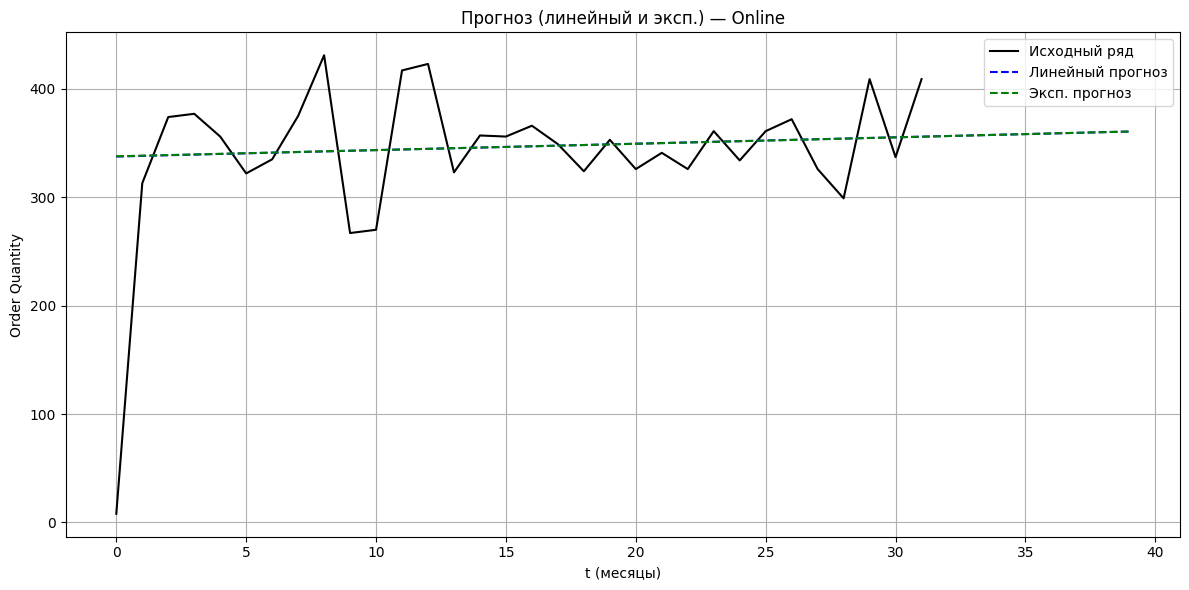

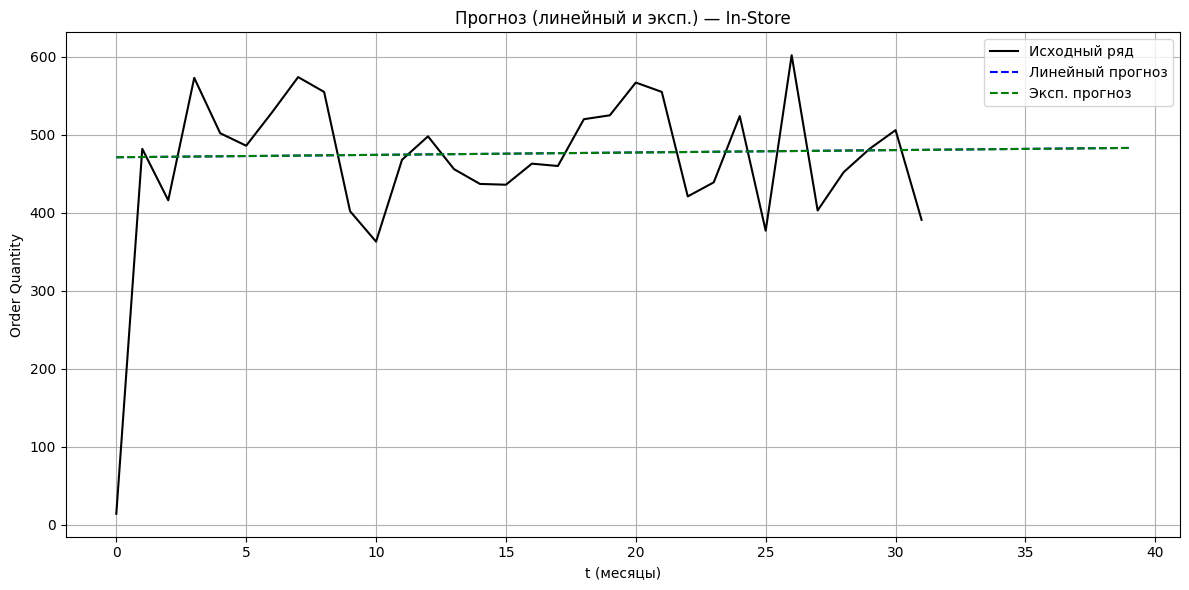

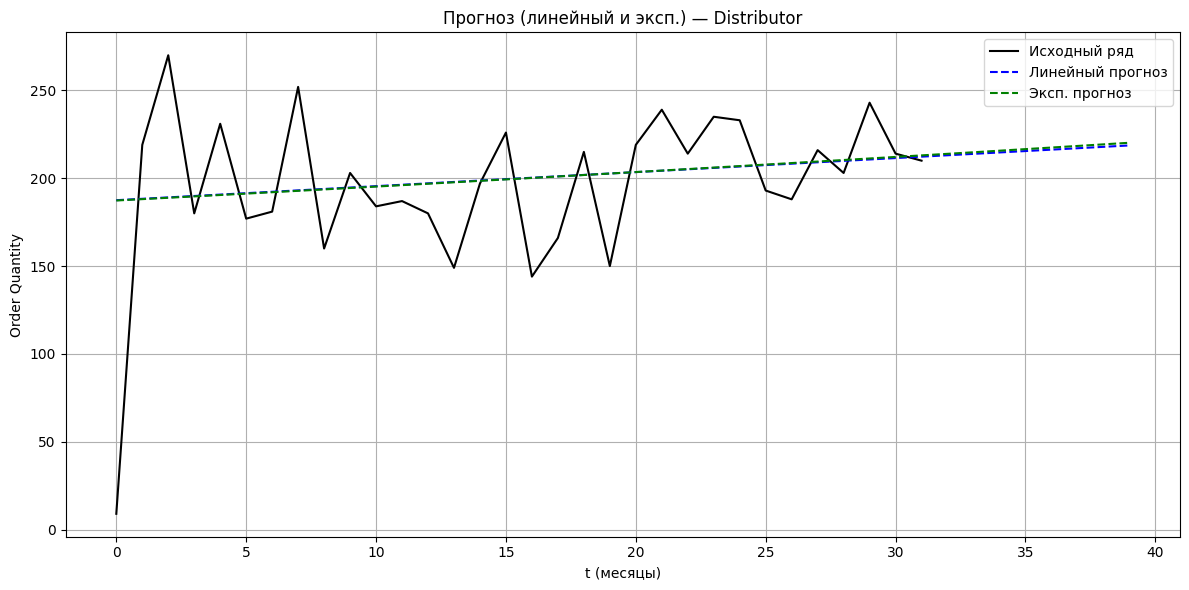

In [111]:
figs = []
for channel in selected_channels:
    Y = monthly[channel].values
    t = np.arange(len(Y))
    future_t = np.arange(len(Y) + 8)

    # –ú–æ–¥–µ–ª–∏
    linear_model = np.poly1d(np.polyfit(t[1:-1], pd.Series(Y).rolling(3, center=True).mean().dropna(), 1))
    exp_params = forecast_results[channel]['exp'][3]  # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏–µ
    exp_model = None
    try:
        popt, _ = curve_fit(lambda t, a, b: a * np.exp(b * t), t[1:-1], pd.Series(Y).rolling(3, center=True).mean().dropna(), maxfev=10000)
        exp_model = lambda x: popt[0] * np.exp(popt[1] * x)
    except:
        pass

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(t, Y, label="–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥", color="black")
    ax.plot(future_t, linear_model(future_t), label="–õ–∏–Ω–µ–π–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑", linestyle="--", color="blue")
    if exp_model:
        ax.plot(future_t, exp_model(future_t), label="–≠–∫—Å–ø. –ø—Ä–æ–≥–Ω–æ–∑", linestyle="--", color="green")
    
    ax.set_title(f"–ü—Ä–æ–≥–Ω–æ–∑ (–ª–∏–Ω–µ–π–Ω—ã–π –∏ —ç–∫—Å–ø.) ‚Äî {channel}")
    ax.set_xlabel("t (–º–µ—Å—è—Ü—ã)")
    ax.set_ylabel("Order Quantity")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    figs.append(fig)

plt.show()

–£ Online –∏ Distributor ‚Äî –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —É—Å—Ç–æ–π—á–∏–≤—ã–π —Ä–æ—Å—Ç, —Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ–º—ã–π –æ–±–µ–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏.

–£ In-Store ‚Äî —Ç–∞–∫–∂–µ –∑–∞–º–µ—Ç–µ–Ω —Ä–æ—Å—Ç, –Ω–æ —Ä–∞–∑–±—Ä–æ—Å –¥–∞–Ω–Ω—ã—Ö —á—É—Ç—å —à–∏—Ä–µ, —á—Ç–æ –æ—Ç—Ä–∞–∂–µ–Ω–æ –≤ –ø—Ä–æ–≥–Ω–æ–∑–µ.

# 7

In [112]:
def brown_forecast(series, alpha=0.3, forecast_steps=7, stop_at=None):
    if stop_at is None:
        stop_at = len(series)

    S1 = [series[1]]
    S2 = [series[1]]

    for t in range(1, stop_at):
        S1.append(alpha * series[t] + (1 - alpha) * S1[-1])
        S2.append(alpha * S1[-1] + (1 - alpha) * S2[-1])

    S1 = np.array(S1)
    S2 = np.array(S2)

    a_t = 2 * S1[-1] - S2[-1]
    b_t = (alpha / (1 - alpha)) * (S1[-1] - S2[-1])

    fitted = a_t + b_t * np.arange(len(series))
    forecast = [a_t + b_t * k for k in range(1, forecast_steps + 1)]

    # –û—Ü–µ–Ω–∫–∞ –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏ (–Ω–∞ –æ–±—É—á–∞—é—â–µ–º –∫—É—Å–∫–µ)
    residuals = series[:stop_at] - (2 * S1 - S2)
    std = np.std(residuals)
    ci = 1.96 * std

    return fitted, forecast, ci

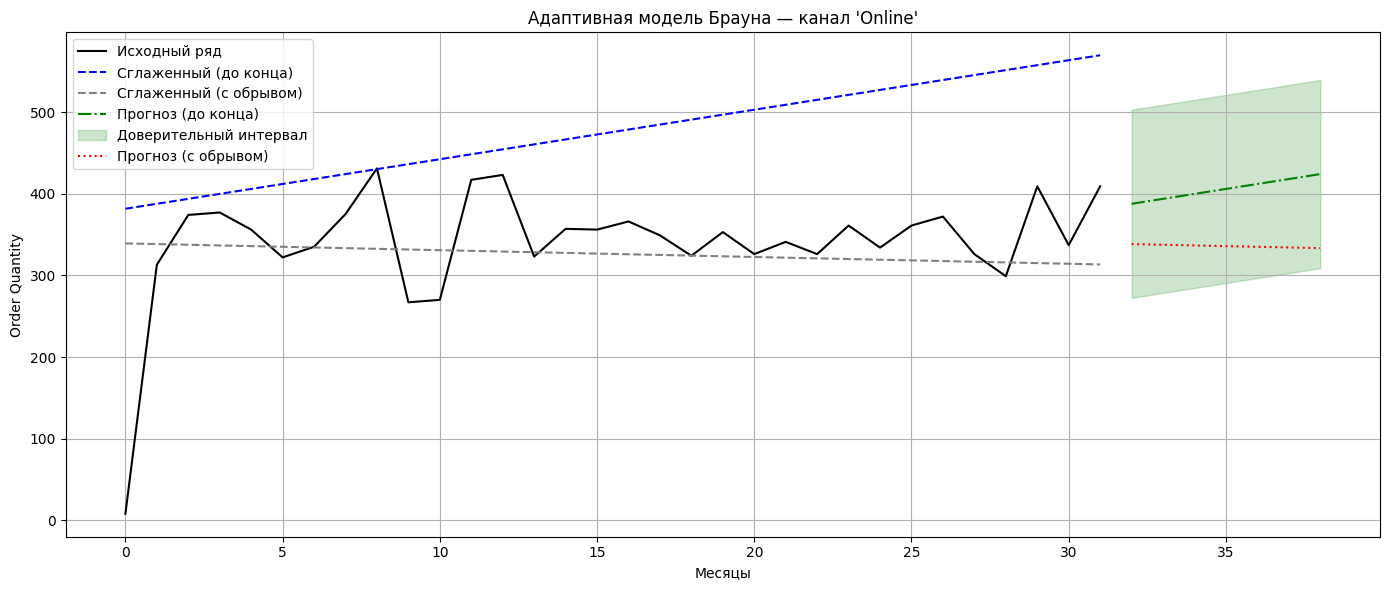

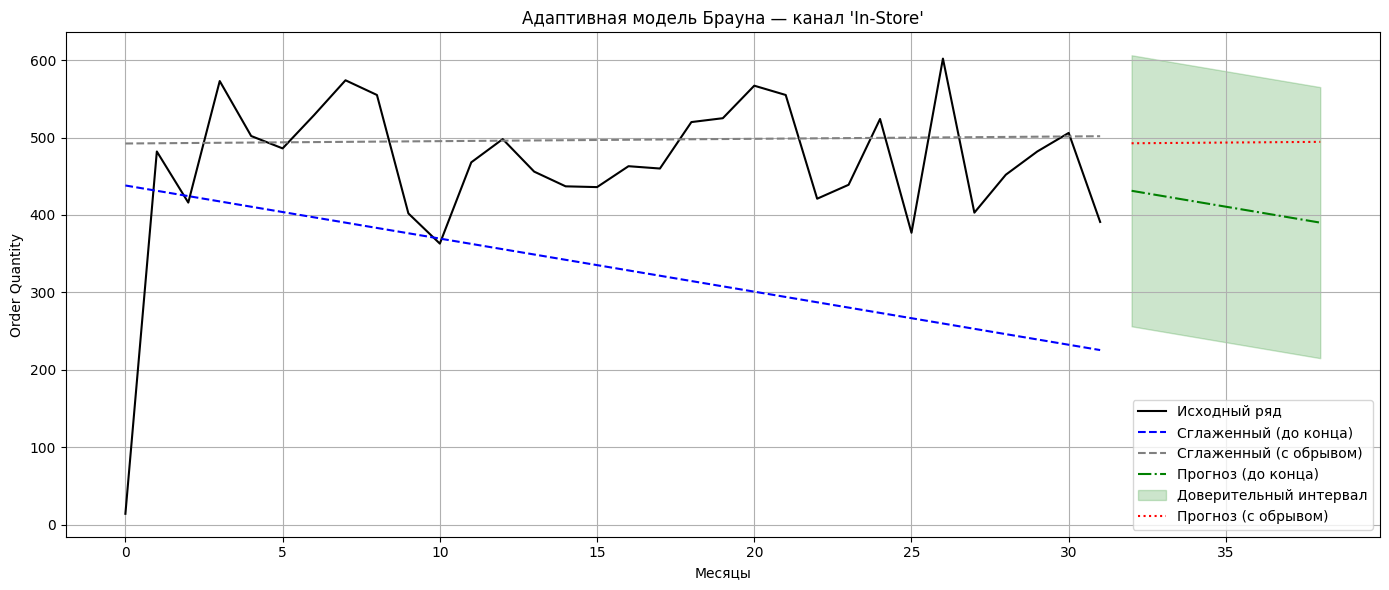

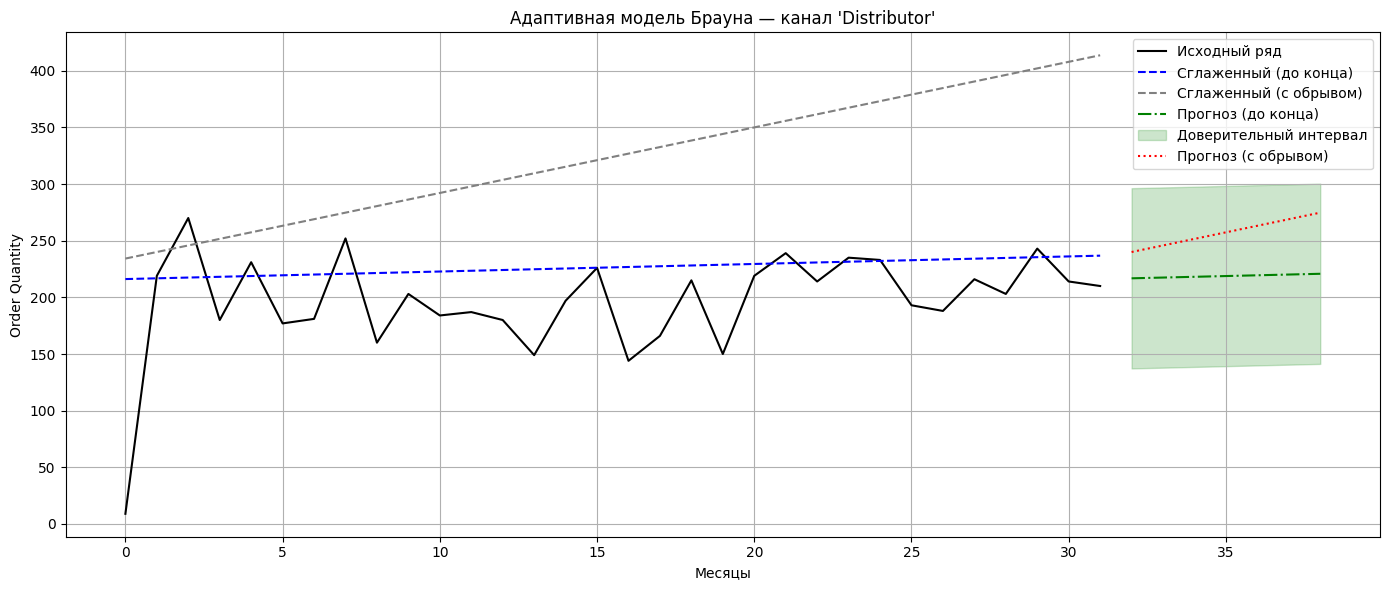

In [113]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø–æ –≤—Å–µ–º –∫–∞–Ω–∞–ª–∞–º
alpha = 0.3
forecast_steps = 7

for channel in selected_channels:
    series = monthly[channel].values

    fitted_all, forecast_all, ci_all = brown_forecast(series, alpha, forecast_steps)
    fitted_partial, forecast_partial, ci_partial = brown_forecast(series, alpha, forecast_steps, stop_at=len(series) - forecast_steps)

    t = np.arange(len(series))
    future_t = np.arange(len(series), len(series) + forecast_steps)

    plt.figure(figsize=(14, 6))
    plt.plot(t, series, label="–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥", color="black")
    plt.plot(t, fitted_all, label="–°–≥–ª–∞–∂–µ–Ω–Ω—ã–π (–¥–æ –∫–æ–Ω—Ü–∞)", linestyle="--", color="blue")
    plt.plot(t, fitted_partial, label="–°–≥–ª–∞–∂–µ–Ω–Ω—ã–π (—Å –æ–±—Ä—ã–≤–æ–º)", linestyle="--", color="gray")

    plt.plot(future_t, forecast_all, label="–ü—Ä–æ–≥–Ω–æ–∑ (–¥–æ –∫–æ–Ω—Ü–∞)", linestyle="-.", color="green")
    plt.fill_between(future_t, np.array(forecast_all)-ci_all, np.array(forecast_all)+ci_all,
                     color='green', alpha=0.2, label="–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª")

    plt.plot(future_t, forecast_partial, label="–ü—Ä–æ–≥–Ω–æ–∑ (—Å –æ–±—Ä—ã–≤–æ–º)", linestyle=":", color="red")
    plt.title(f"–ê–¥–∞–ø—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å –ë—Ä–∞—É–Ω–∞ ‚Äî –∫–∞–Ω–∞–ª '{channel}'")
    plt.xlabel("–ú–µ—Å—è—Ü—ã")
    plt.ylabel("Order Quantity")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

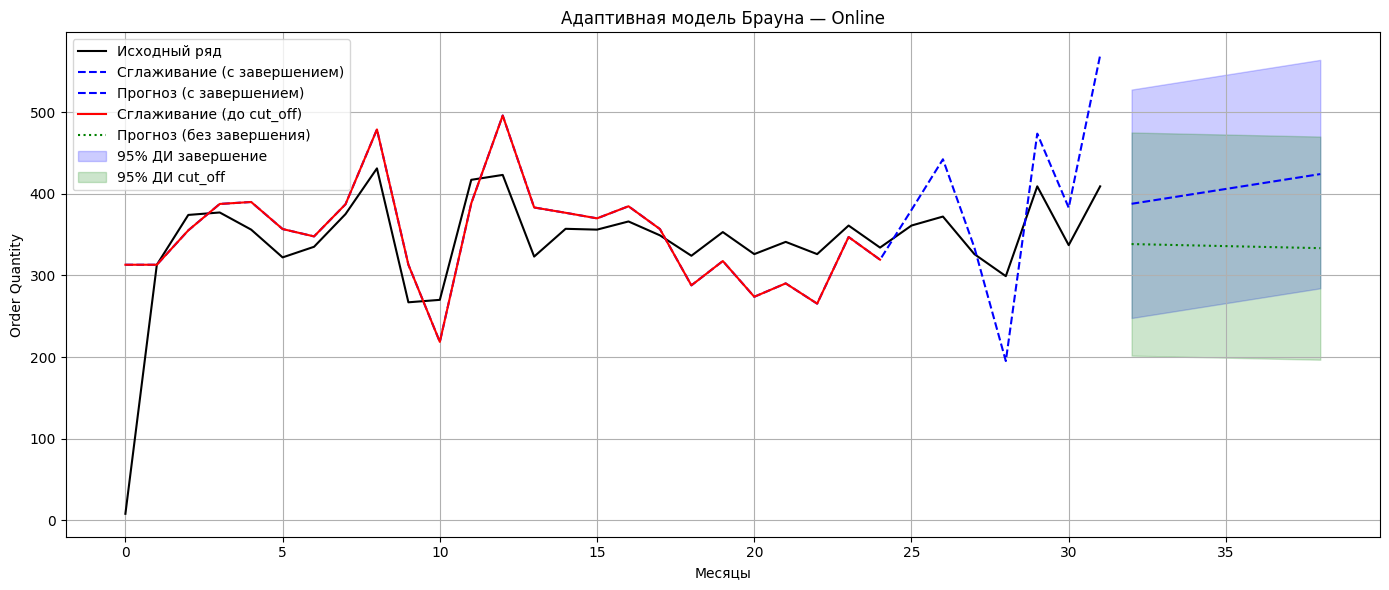

Online
–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (—Å –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ–º): (284.1400678816489, 563.8977341437608)
–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (–±–µ–∑ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è): (196.68597588735284, 469.9530944542822)
----------------------------------------------------------------------


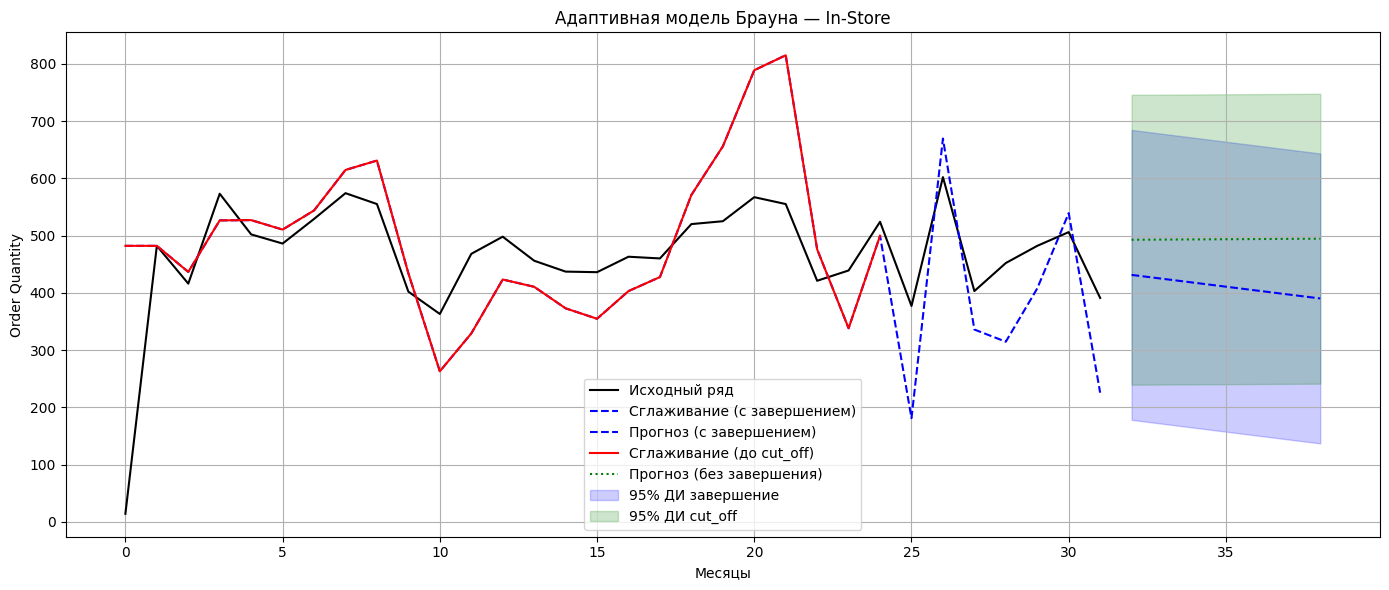

In-Store
–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (—Å –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ–º): (136.89332528363457, 643.2925369601198)
–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (–±–µ–∑ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è): (241.26182489001417, 747.6407652927516)
----------------------------------------------------------------------


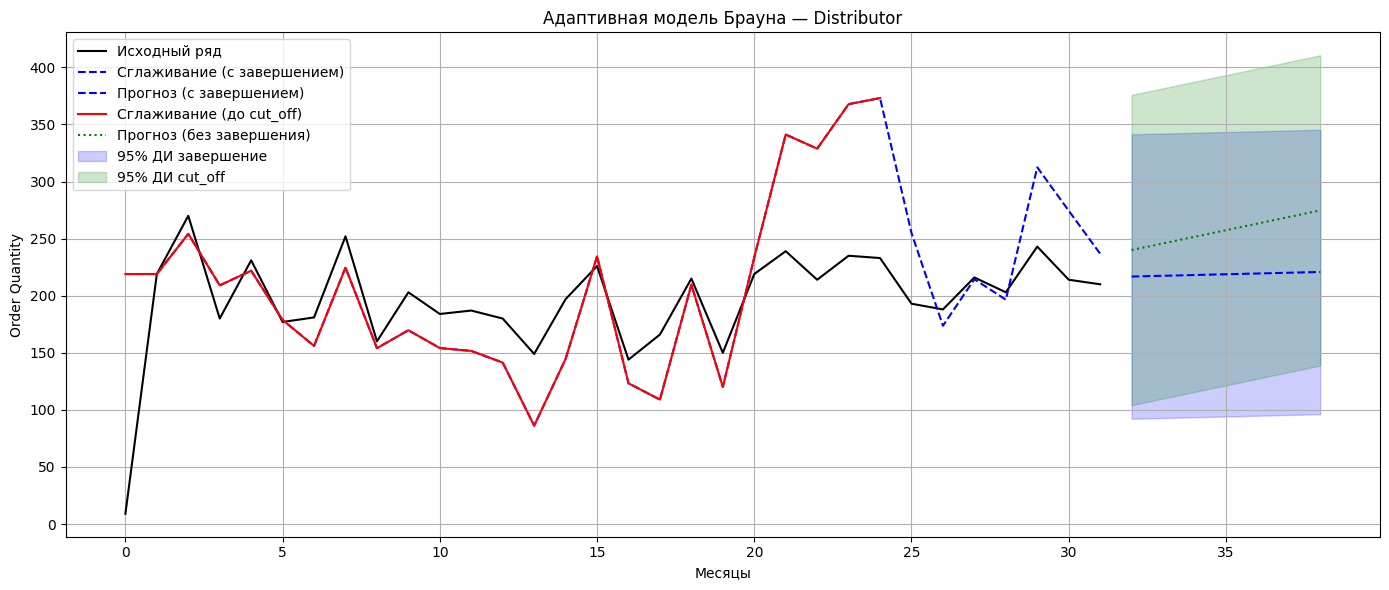

Distributor
–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (—Å –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ–º): (96.21587851792668, 345.368466993711)
–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (–±–µ–∑ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è): (138.87002750698116, 410.5996013647597)
----------------------------------------------------------------------


In [119]:
def brown_model(series, alpha=0.3, forecast_steps=7, cut_off=None):
    if cut_off:
        series = series[:cut_off]

    S1 = [series[1]]
    S2 = [series[1]]
    for t in range(1, len(series)):
        S1.append(alpha * series[t] + (1 - alpha) * S1[-1])
        S2.append(alpha * S1[-1] + (1 - alpha) * S2[-1])

    S1 = np.array(S1)
    S2 = np.array(S2)
    a_t = 2 * S1[-1] - S2[-1]
    b_t = (alpha / (1 - alpha)) * (S1[-1] - S2[-1])

    forecast = [a_t + b_t * k for k in range(1, forecast_steps + 1)]
    fitted = [2 * S1[i] - S2[i] + (alpha / (1 - alpha)) * (S1[i] - S2[i]) * i for i in range(len(series))]

    residuals = series[:len(fitted)] - fitted
    stderr = np.std(residuals)
    ci = 1.96 * stderr
    return np.array(fitted), np.array(forecast), (forecast[-1] - ci, forecast[-1] + ci)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
alpha = 0.3
forecast_steps = 7
cut_off = len(series) - forecast_steps

for channel in selected_channels:
    series = monthly[channel].values
    cut_off = len(series) - forecast_steps

    fitted_full, forecast_full, interval_full = brown_model(series, alpha, forecast_steps)
    fitted_cut, forecast_cut, interval_cut = brown_model(series, alpha, forecast_steps, cut_off)

    t = np.arange(len(series))
    future_t = np.arange(len(series), len(series) + forecast_steps)

    plt.figure(figsize=(14, 6))
    plt.plot(t, series, label="–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥", color='black')
    plt.plot(t, fitted_full, label="–°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ (—Å –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ–º)", linestyle='--', color='blue')
    plt.plot(future_t, forecast_full, label="–ü—Ä–æ–≥–Ω–æ–∑ (—Å –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ–º)", linestyle='--', color='blue')
    plt.plot(t[:cut_off], fitted_cut, label="–°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ (–¥–æ cut_off)", linestyle='-', color='red')
    plt.plot(future_t, forecast_cut, label="–ü—Ä–æ–≥–Ω–æ–∑ (–±–µ–∑ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è)", linestyle=':', color='green')
    plt.fill_between(future_t, forecast_full - interval_full[1] + forecast_full[-1],
                            forecast_full + interval_full[1] - forecast_full[-1],
                            color='blue', alpha=0.2, label='95% –î–ò –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ')

    plt.fill_between(future_t, forecast_cut - interval_cut[1] + forecast_cut[-1],
                            forecast_cut + interval_cut[1] - forecast_cut[-1],
                            color='green', alpha=0.2, label='95% –î–ò cut_off')

    plt.title(f"–ê–¥–∞–ø—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å –ë—Ä–∞—É–Ω–∞ ‚Äî {channel}")
    plt.xlabel("–ú–µ—Å—è—Ü—ã")
    plt.ylabel("Order Quantity")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"{channel}")
    print("–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (—Å –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ–º):", interval_full)
    print("–ò–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ (–±–µ–∑ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è):", interval_cut)
    print("-" * 70)